In [680]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from functools import reduce
import matplotlib.cm as cm
%matplotlib inline
import matplotlib.ticker as mtick

In [681]:
from sklearn.preprocessing import MinMaxScaler

In [307]:
!pip freeze

absl-py==1.2.0
aiohttp @ file:///C:/ci/aiohttp_1646806572557/work
aiosignal @ file:///tmp/build/80754af9/aiosignal_1637843061372/work
alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
anaconda-client @ file:///C:/ci/anaconda-client_1635342725944/work
anaconda-navigator==2.1.4
anaconda-project @ file:///tmp/build/80754af9/anaconda-project_1637161053845/work
anyio @ file:///C:/ci/anyio_1644481921011/work/dist
appdirs==1.4.4
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_1645000214183/work
argon2-cffi-bindings @ file:///C:/ci/argon2-cffi-bindings_1644551690056/work
arrow @ file:///opt/conda/conda-bld/arrow_1649166651673/work
astroid @ file:///C:/ci/astroid_1628063282661/work
astropy @ file:///C:/ci/astropy_1650634291321/work
asttokens @ file:///opt/conda/conda-bld/asttokens_1646925590279/work
astunparse==1.6.3
async-timeout @ file:///tmp/build/80754af9/async-timeout_1637851218186/work
atomicwrites==1.4.0
attrs @ file:///opt/conda/conda-bld/attrs_1642510447205/work

llvmlite==0.38.0
locket @ file:///C:/ci/locket_1647006279389/work
lxml @ file:///C:/ci/lxml_1646642862366/work
Markdown @ file:///C:/ci/markdown_1614364082838/work
MarkupSafe @ file:///C:/ci/markupsafe_1621528502553/work
matplotlib @ file:///C:/ci/matplotlib-suite_1647423638658/work
matplotlib-inline @ file:///tmp/build/80754af9/matplotlib-inline_1628242447089/work
mccabe==0.6.1
menuinst @ file:///C:/ci/menuinst_1631733438520/work
missingno==0.5.1
mistune @ file:///C:/ci/mistune_1607359457024/work
mkl-fft==1.3.1
mkl-random @ file:///C:/ci/mkl_random_1626186184308/work
mkl-service==2.4.0
mock @ file:///tmp/build/80754af9/mock_1607622725907/work
mpmath==1.2.1
msgpack @ file:///C:/ci/msgpack-python_1612287350784/work
multidict @ file:///C:/ci/multidict_1607349747897/work
multipledispatch @ file:///C:/ci/multipledispatch_1607574329826/work
munkres==1.1.4
mypy-extensions==0.4.3
navigator-updater==0.2.1
nbclassic @ file:///opt/conda/conda-bld/nbclassic_1644943264176/work
nbclient @ file:///C

In [240]:
np.__version__ # check version of numpy

'1.21.5'

## import and read dataset
## dataset EdStatsData

In [682]:
df= pd.read_csv("EdStatsData.csv",sep = ',')
pd.set_option('display.max_columns', None)

In [683]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [715]:
df.shape

(886930, 70)

In [716]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

### drop list of non countries I get

In [717]:
list_not_country = ['Arab World',
 'Arab World',
 'Arab World',
'Macao SAR, China',
 'East Asia & Pacific',
 'East Asia & Pacific',
 'East Asia & Pacific',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (excluding high income)',
 'Euro area',
 'Euro area',
 'Euro area',
 'Europe & Central Asia',
 'Europe & Central Asia',
 'Europe & Central Asia',
 'Europe & Central Asia (excluding high income)',
 'Europe & Central Asia (excluding high income)',
 'Europe & Central Asia (excluding high income)',
 'European Union',
 'European Union',
 'European Union',
 'Heavily indebted poor countries (HIPC)',
 'Heavily indebted poor countries (HIPC)',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'High income',
 'High income',
 'Latin America & Caribbean',
 'Latin America & Caribbean',
 'Latin America & Caribbean',
 'Latin America & Caribbean (excluding high income)',
 'Latin America & Caribbean (excluding high income)',
 'Latin America & Caribbean (excluding high income)',
 'Least developed countries: UN classification',
 'Least developed countries: UN classification',
 'Least developed countries: UN classification',
 'Low & middle income',
 'Low & middle income',
 'Low & middle income',
 'Low income',
 'Low income',
 'Low income',
 'Lower middle income',
 'Lower middle income',
 'Lower middle income',
 'Middle East & North Africa',
 'Middle East & North Africa',
 'Middle East & North Africa',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (excluding high income)',
 'Middle income',
 'Middle income',
 'Middle income',
 'North America',
 'North America',
 'North America',
 'OECD members',
 'OECD members',
 'OECD members',
 'South Asia',
 'South Asia',
 'South Asia',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (excluding high income)',
 'Sub-Saharan Africa (excluding high income)',
 'Sub-Saharan Africa (excluding high income)',
 'Upper middle income',
 'Upper middle income',
 'Upper middle income',
 'World',
 'World',
 'World',
 'American Samoa',
 'American Samoa',
 'American Samoa',
 'American Samoa',
 'American Samoa',
 'American Samoa',
 'Antigua and Barbuda',
 'Aruba',
 'Aruba',
 'Bahamas, The',
 'Bahamas, The',
 'Bosnia and Herzegovina',
 'British Virgin Islands',
 'British Virgin Islands',
 'British Virgin Islands',
 'British Virgin Islands',
 'British Virgin Islands',
 'British Virgin Islands',
 'Burkina Faso',
 'Cabo Verde',
 'Cayman Islands',
 'Cayman Islands',
 'Cayman Islands',
 'Cayman Islands',
 'Central African Republic',
 'Central African Republic',
 'Channel Islands',
 'Channel Islands',
 'Channel Islands',
 'Channel Islands',
 'Channel Islands',
 'Channel Islands',
 'Comoros',
 'Comoros',
 'Congo, Dem. Rep.',
 'Curacao',
 'Curacao',
 'Curacao',
 'Curacao',
 'Curacao',
 'Curacao',
 'Curacao',
 'Egypt, Arab Rep.',
 'Egypt, Arab Rep.',
 'Equatorial Guinea',
 'Equatorial Guinea',
 'Equatorial Guinea',
 'Equatorial Guinea',
 'Ethiopia',
 'Faroe Islands',
 'Faroe Islands',
 'Faroe Islands',
 'Faroe Islands',
 'Faroe Islands',
 'Fiji',
 'Fiji',
 'Fiji',
 'French Polynesia',
 'French Polynesia',
 'French Polynesia',
 'French Polynesia',
 'French Polynesia',
 'Gambia, The',
 'Gambia, The',
 'Gambia, The',
 'Georgia',
 'Gibraltar',
 'Gibraltar',
 'Gibraltar',
 'Gibraltar',
 'Gibraltar',
 'Greece',
 'Greenland',
 'Greenland',
 'Greenland',
 'Greenland',
 'Greenland',
 'Grenada',
 'Grenada',
 'Guam',
 'Guam',
 'Guam',
 'Guam',
 'Guam',
 'Guinea',
 'Guinea-Bissau',
 'Guinea-Bissau',
 'Guinea-Bissau',
 'Guinea-Bissau',
 'Isle of Man',
 'Isle of Man',
 'Isle of Man',
 'Isle of Man',
 'Isle of Man',
 'Isle of Man',
 'Kiribati',
 'Kiribati',
 'Kiribati',
 'Kiribati',
 'Korea, Dem. People’s Rep.',
 'Korea, Dem. People’s Rep.',
 'Korea, Dem. People’s Rep.',
 'Korea, Dem. People’s Rep.',
 'Korea, Dem. People’s Rep.',
 'Korea, Dem. People’s Rep.',
 'Liberia',
 'Liberia',
 'Liberia',
 'Liberia',
 'Liechtenstein',
 'Liechtenstein',
 'Macedonia, FYR',
 'Marshall Islands',
 'Marshall Islands',
 'Marshall Islands',
 'Marshall Islands',
 'Micronesia, Fed. Sts.',
 'Micronesia, Fed. Sts.',
 'Micronesia, Fed. Sts.',
 'Micronesia, Fed. Sts.',
 'Montenegro',
 'Montenegro',
 'Montenegro',
 'Myanmar',
 'Myanmar',
 'Myanmar',
 'Nauru',
 'Nauru',
 'Nauru',
 'Nauru',
 'Nauru',
 'Nauru',
 'Nauru',
 'New Caledonia',
 'New Caledonia',
 'New Caledonia',
 'New Caledonia',
 'New Caledonia',
 'Nicaragua',
 'Northern Mariana Islands',
 'Northern Mariana Islands',
 'Northern Mariana Islands',
 'Northern Mariana Islands',
 'Northern Mariana Islands',
 'Northern Mariana Islands',
 'Palau',
 'Palau',
 'Palau',
 'Palau',
 'Palau',
 'Palau',
 'Papua New Guinea',
 'Papua New Guinea',
 'Papua New Guinea',
 'Puerto Rico',
 'Samoa',
 'Samoa',
 'San Marino',
 'San Marino',
 'San Marino',
 'San Marino',
 'Sao Tome and Principe',
 'Saudi Arabia',
 'Seychelles',
 'Seychelles',
 'Sierra Leone',
 'Sierra Leone',
 'Sint Maarten (Dutch part)',
 'Sint Maarten (Dutch part)',
 'Sint Maarten (Dutch part)',
 'Sint Maarten (Dutch part)',
 'Sint Maarten (Dutch part)',
 'Sint Maarten (Dutch part)',
 'Solomon Islands',
 'Solomon Islands',
 'South Sudan',
 'South Sudan',
 'South Sudan',
 'South Sudan',
 'South Sudan',
 'South Sudan',
 'St. Kitts and Nevis',
 'St. Kitts and Nevis',
 'St. Lucia',
 'St. Martin (French part)',
 'St. Martin (French part)',
 'St. Martin (French part)',
 'St. Martin (French part)',
 'St. Martin (French part)',
 'St. Martin (French part)',
 'St. Martin (French part)',
 'St. Vincent and the Grenadines',
 'St. Vincent and the Grenadines',
 'Tanzania',
 'Tanzania',
 'Timor-Leste',
 'Timor-Leste',
 'Timor-Leste',

 'Turks and Caicos Islands',
 'Turks and Caicos Islands',
 'Turks and Caicos Islands',
 'Turks and Caicos Islands',
 'Turks and Caicos Islands',
 'Tuvalu',
 'Tuvalu',
 'Tuvalu',
 'Tuvalu',
 'Uganda',
 'Uganda',
 'Vanuatu',
 'Vanuatu',
 'Vanuatu',
 'Vanuatu',
 'Virgin Islands (U.S.)',
 'Virgin Islands (U.S.)',
 'Virgin Islands (U.S.)',
 'Virgin Islands (U.S.)',
 'West Bank and Gaza',
]


In [718]:
data = df[~df["Country Name"].isin(list_not_country)]## remove the list i got from reading dataset on notepad
## add filter on data 50%

In [719]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546085 entries, 91625 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    546085 non-null  object 
 1   Country Code    546085 non-null  object 
 2   Indicator Name  546085 non-null  object 
 3   Indicator Code  546085 non-null  object 
 4   1970            59334 non-null   float64
 5   1971            25040 non-null   float64
 6   1972            25020 non-null   float64
 7   1973            25333 non-null   float64
 8   1974            25463 non-null   float64
 9   1975            71679 non-null   float64
 10  1976            26915 non-null   float64
 11  1977            26980 non-null   float64
 12  1978            26629 non-null   float64
 13  1979            25947 non-null   float64
 14  1980            72774 non-null   float64
 15  1981            27405 non-null   float64
 16  1982            26200 non-null   float64
 17  1983  

In [720]:
data.loc[data["Indicator Name"].str.startswith( "GDP per capita")]## look for GDP indicator

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
92869,Afghanistan,AFG,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,364.570573,376.758714,364.095436,389.416358,397.985905,440.368155,444.950138,524.823533,553.300289,569.233388,630.427413,621.818079,610.241924,599.135196,596.257639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92870,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,157.187422,160.372836,136.117014,144.110319,174.942038,187.975604,199.026173,226.005344,249.287386,277.900742,274.880859,266.493042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.409691,187.845095,198.728544,219.141353,250.294130,272.563077,369.835796,373.361116,445.893298,553.300289,603.537023,669.009051,631.744971,612.069651,569.577923,561.778746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92871,Afghanistan,AFG,"GDP per capita, PPP (constant 2011 internation...",NY.GDP.PCAP.PP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1063.635574,1099.194507,1062.249360,1136.123214,1161.124889,1284.775213,1298.143159,1531.173993,1614.255001,1660.739856,1839.273579,1814.155825,1780.382366,1747.978457,1739.583177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92872,Afghanistan,AFG,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,875.517610,922.829449,916.334475,1011.595524,1065.619665,1210.479265,1247.066144,1482.098837,1581.600836,1660.739856,1873.153946,1877.411953,1875.447407,1864.973641,1879.695509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96534,Albania,ALB,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2110.633218,2187.642806,2205.052944,2182.631918,2110.441428,2104.308584,2180.372091,2120.422839,2051.243570,2193.263825,1947.883545,1379.816978,1288.258965,1420.573288,1547.954353,1764.699296,1937.290072,1738.166460,1906.717261,2177.896633,2337.942386,2547.377316,2663.140477,2827.455778,3001.408618,3189.395111,3383.893726,3610.727554,3775.380988,3928.338638,4094.358832,4210.082199,4276.921550,4327.644518,4413.561583,4524.990993,4684.967034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880847,Zambia,ZMB,"GDP per capita, PPP (current international $)",NY.GDP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1513.668718,1523.168420,1492.426961,1590.968004,1446.803168,1479.696374,1556.583483,1597.314003,1562.570077,1613.319256,1666.884356,1746.929533,1804.284491,1916.105741,2051.607433,2210.472268,2392.690039,2589.897156,2768.423449,2961.990560,3212.941881,3361.112069,3574.058520,3701.392674,3826.464402,3869.976869,3940.701882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
884509,Zimbabwe,ZWE,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1194.171386,1257.986869,1317.311637,1306.506343,1347.444332,1279.409974,1246.046426,1126.003393,1062.626023,1062.994205,1175.135243,1274.683375,1259

## merge with EdStats Country to get other informations

In [721]:

df_edstats_country = pd.read_csv("EdStatsCountry.csv", sep = ',')
pd.set_option('display.max_columns', None)
df_edstats_country.head(3)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accou...,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accou...,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN


In [722]:
data_final = pd.merge(data,df_edstats_country[["Country Code","Region","Income Group","Latest population census"]])

In [723]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546085 entries, 0 to 546084
Data columns (total 73 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Country Name              546085 non-null  object 
 1   Country Code              546085 non-null  object 
 2   Indicator Name            546085 non-null  object 
 3   Indicator Code            546085 non-null  object 
 4   1970                      59334 non-null   float64
 5   1971                      25040 non-null   float64
 6   1972                      25020 non-null   float64
 7   1973                      25333 non-null   float64
 8   1974                      25463 non-null   float64
 9   1975                      71679 non-null   float64
 10  1976                      26915 non-null   float64
 11  1977                      26980 non-null   float64
 12  1978                      26629 non-null   float64
 13  1979                      25947 non-null   f

In [724]:
data_final.isna().mean(axis=1)

0         0.835616
1         0.835616
2         0.835616
3         0.835616
4         0.904110
            ...   
546080    0.849315
546081    0.849315
546082    0.849315
546083    0.849315
546084    0.849315
Length: 546085, dtype: float64

In [725]:
#mod_data = data_final[data_final.isnull().mean(axis = 1) < 0.70]

### check the null values

In [726]:
null_percentage= data_final.isnull().sum()/data_final.shape[0]*100  # percentage of null in every column

In [727]:
null_percentage

Country Name                  0.000000
Country Code                  0.000000
Indicator Name                0.000000
Indicator Code                0.000000
1970                         89.134659
                               ...    
2100                         92.667808
Unnamed: 69                 100.000000
Region                        0.000000
Income Group                  0.000000
Latest population census      0.000000
Length: 73, dtype: float64

<AxesSubplot:>

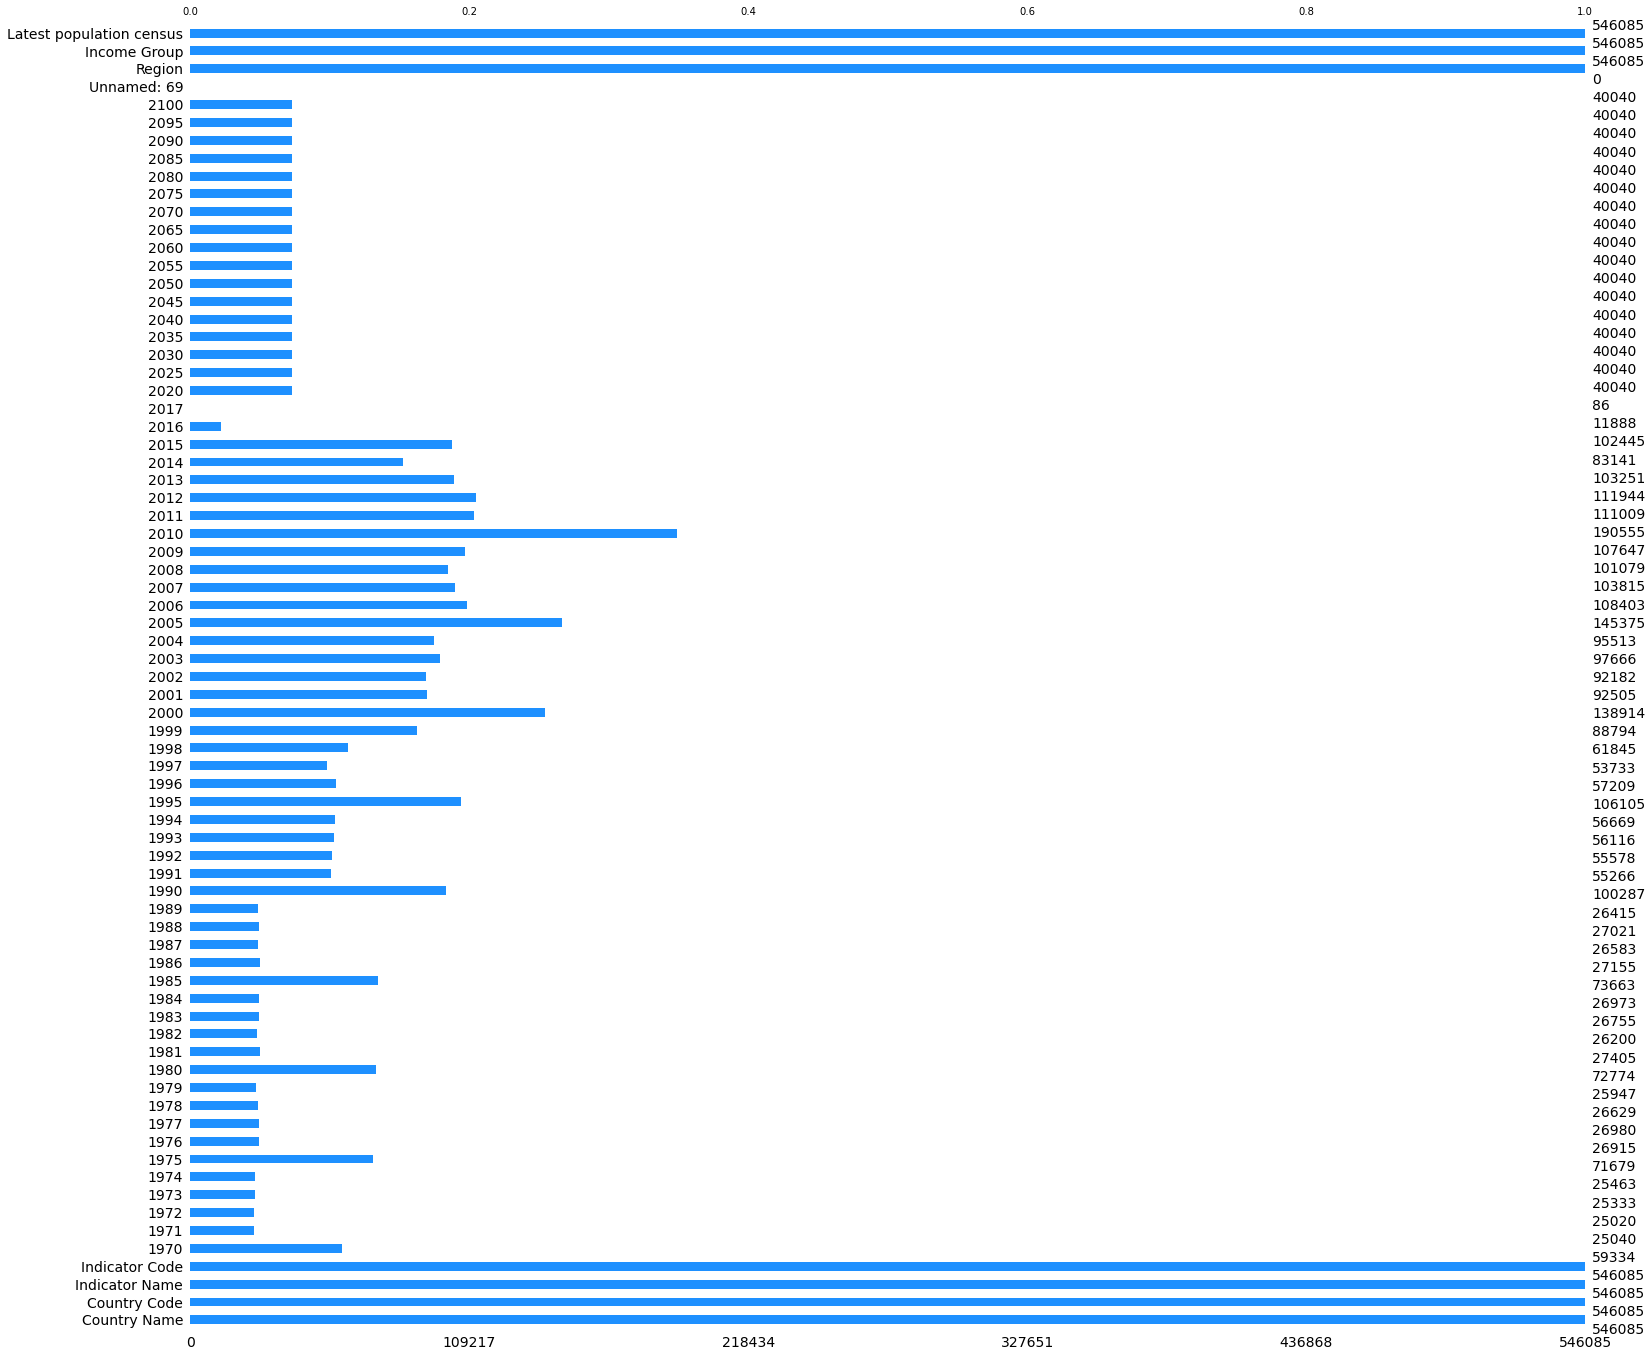

In [728]:
msno.bar(data_final,color="dodgerblue", fontsize=14)

In [729]:
perc_null_data = data_final.isnull().mean().round(4)*100

Text(0.5, 1.0, 'Quantifying missing data')

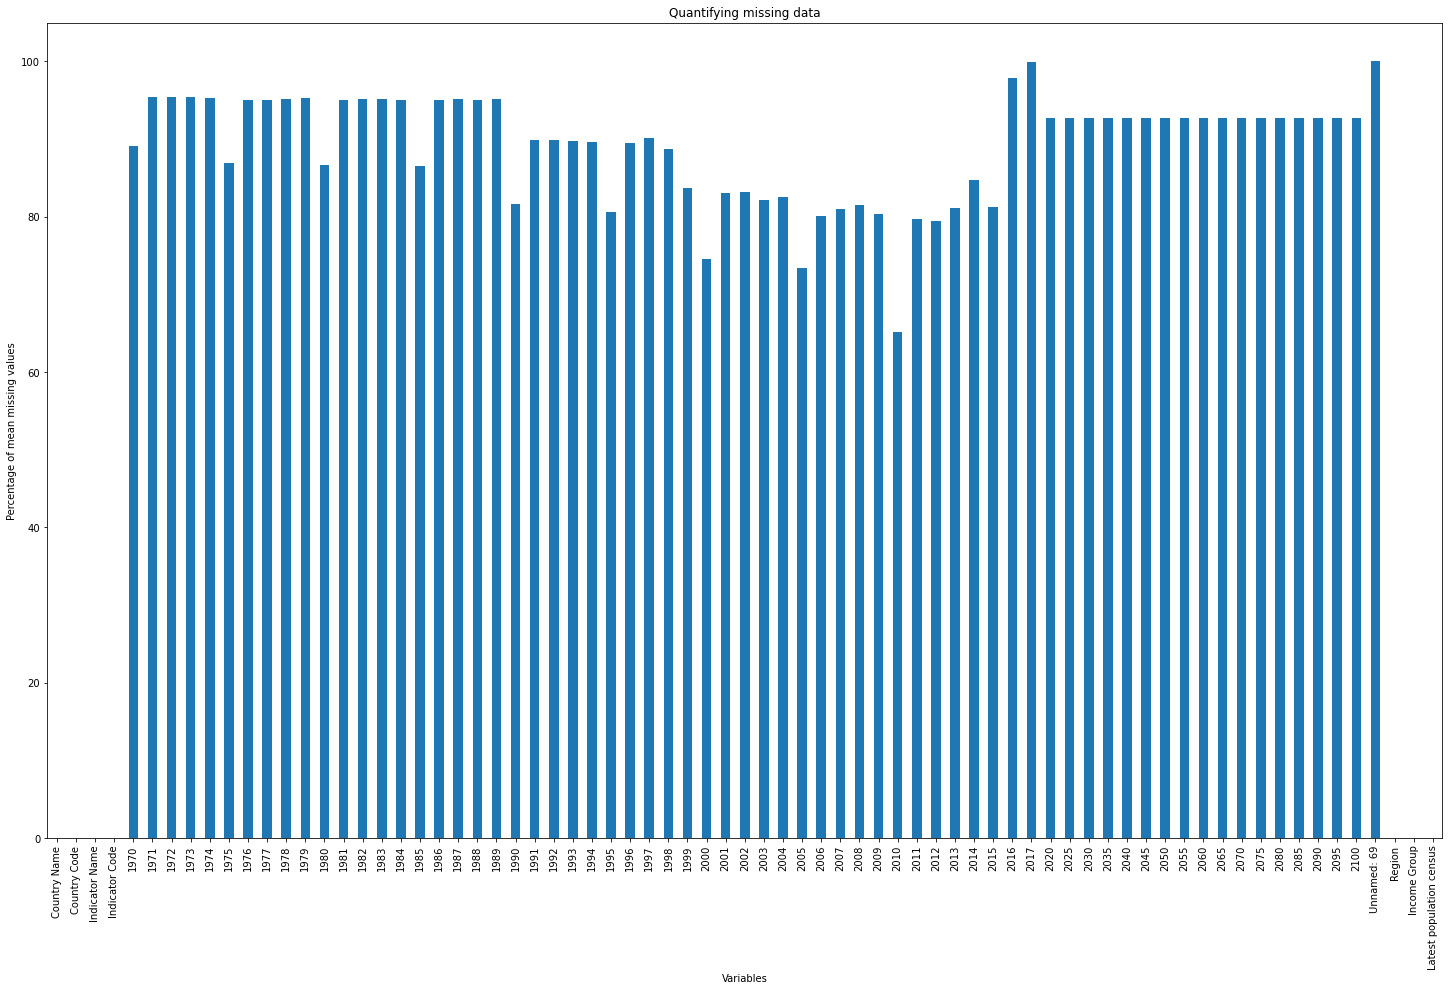

In [730]:

perc_null_data.plot.bar(figsize=(25,15))
plt.ylabel('Percentage of mean missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')


## keep data between 2000 and 2015

In [731]:
#df_newtt = data[["Country Name","Country Code","Indicator Name","Indicator Code","Income Group","Region",'Latest population census',"2000","2001","2002","2003",'2004',"2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015"]]

In [732]:
df_new = data_final[data_final.columns[data_final.columns.isin(["Country Name","Country Code","Indicator Name","Indicator Code","Income Group","Region",'Latest population census',"2000","2001","2002","2003",'2004',"2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015"])]]

In [733]:
df_new.shape

(546085, 23)

In [734]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546085 entries, 0 to 546084
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Country Name              546085 non-null  object 
 1   Country Code              546085 non-null  object 
 2   Indicator Name            546085 non-null  object 
 3   Indicator Code            546085 non-null  object 
 4   2000                      138914 non-null  float64
 5   2001                      92505 non-null   float64
 6   2002                      92182 non-null   float64
 7   2003                      97666 non-null   float64
 8   2004                      95513 non-null   float64
 9   2005                      145375 non-null  float64
 10  2006                      108403 non-null  float64
 11  2007                      103815 non-null  float64
 12  2008                      101079 non-null  float64
 13  2009                      107647 non-null  f

In [735]:
df_new['Indicator Name'].value_counts()

Adjusted net enrolment rate, lower secondary, both sexes (%)                                       149
Population, ages 10-18, female                                                                     149
Population, ages 10-18, total                                                                      149
Population, ages 11-15, female                                                                     149
Population, ages 11-15, male                                                                       149
                                                                                                  ... 
Expenditure on education not allocated by level as % of government expenditure on education (%)    149
Expenditure on lower secondary as % of government expenditure on education (%)                     149
Expenditure on lower secondary as % of total government expenditure (%)                            149
Expenditure on post-secondary non-tertiary as % of government expenditure

In [736]:
df_new['Country Name'] = df_new['Country Name'].replace('Korea, Rep.','South Korea')

C:\Users\naoue\AppData\Local\Temp\ipykernel_23132\3128325459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Country Name'] = df_new['Country Name'].replace('Korea, Rep.','South Korea')


In [737]:
df_new.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Region,Income Group,Latest population census
0,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.059870,NaN,NaN,NaN,NaN,NaN,47.436790,50.627232,NaN,South Asia,Low income,1979
1,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.223100,NaN,NaN,NaN,NaN,NaN,34.073261,37.641541,NaN,South Asia,Low income,1979
2,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.379130,NaN,NaN,NaN,NaN,NaN,0.567060,0.598370,NaN,South Asia,Low income,1979
3,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.152851,NaN,NaN,NaN,NaN,NaN,60.087059,62.906952,NaN,South Asia,Low income,1979
4,Afghanistan,AFG,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Asia,Low income,1979


## create dataframe with the good indicator

In [738]:
indicator_list = ["Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary",
                  "Enrolment in secondary education","Enrolment in tertiary education",
                  "Percentage of enrolment in tertiary education in private institutions (%)",
                 "Percentage of enrolment in secondary education in private institutions (%)",
                  "Percentage of enrolment in upper secondary education in private institutions (%)",
                 "Internet users (per 100 people)","GDP per capita (current US$)",
                  "Personal computers (per 100 people)"]

In [739]:
df_indicator = df_new[df_new['Indicator Name'].isin(indicator_list)]## select list of indicator

In [740]:
df_indicator.shape

(1043, 23)

In [741]:
df_indicator.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1043 entries, 377 to 544504
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Name              1043 non-null   object 
 1   Country Code              1043 non-null   object 
 2   Indicator Name            1043 non-null   object 
 3   Indicator Code            1043 non-null   object 
 4   2000                      761 non-null    float64
 5   2001                      650 non-null    float64
 6   2002                      680 non-null    float64
 7   2003                      662 non-null    float64
 8   2004                      676 non-null    float64
 9   2005                      809 non-null    float64
 10  2006                      644 non-null    float64
 11  2007                      602 non-null    float64
 12  2008                      603 non-null    float64
 13  2009                      584 non-null    float64
 14  2010

In [742]:
df_indicator.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,761.000000,650.000000,680.000000,662.000000,676.000000,809.000000,644.000000,602.000000,603.000000,584.000000,721.000000,612.000000,590.000000,610.000000,578.000000,475.000000
mean,1609.600937,1860.657451,1881.352102,2255.104909,2529.450938,2306.453140,3149.296215,3863.537647,4242.909762,3828.662758,3268.566521,4263.300089,4086.419460,4062.593817,4176.073704,4467.687472
std,6528.828483,6957.898719,7279.329359,8674.383541,9759.565982,9596.854359,11525.398173,13772.262896,15042.436309,13024.783222,12082.350265,14499.628614,12965.820343,13078.344924,13035.347846,12453.793142
min,0.000000,0.004723,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.169460,0.134480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.640000,2.528837,3.390290,3.722158,4.779759,6.332329,7.176232,8.073554,9.454930,10.381900,12.500000,11.720213,12.726000,12.968343,13.925000,16.848777
50%,15.691880,14.678936,15.554995,15.935038,18.474002,21.022747,24.330000,24.897036,26.830000,29.978585,30.000000,31.513525,34.599956,34.863230,39.224070,55.763200
75%,47.100000,68.543310,67.456526,67.712135,70.324869,57.180000,84.415957,95.748425,95.186230,239.030853,75.000000,92.903055,95.791120,94.620198,99.540000,1351.947317
max,82534.873767,82552.567453,89061.050666,108978.489682,123382.014903,126655.598082,135535.002415,170156.694368,192989.189527,152111.598027,144246.368775,162009.877819,106749.013623,113625.132900,119225.380023,101446.786303


# Filter data by indicator

## 1)internet indicator

In [743]:
df_indicator["Indicator Name"].value_counts()

Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary    149
GDP per capita (current US$)                                                                 149
Internet users (per 100 people)                                                              149
Percentage of enrolment in secondary education in private institutions (%)                   149
Percentage of enrolment in tertiary education in private institutions (%)                    149
Percentage of enrolment in upper secondary education in private institutions (%)             149
Personal computers (per 100 people)                                                          149
Name: Indicator Name, dtype: int64

In [744]:
df_internet = df_indicator.loc[df_indicator["Indicator Name"] == "Internet users (per 100 people)"]
# create dataframe with one indicator

In [745]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 1375 to 543795
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Name              149 non-null    object 
 1   Country Code              149 non-null    object 
 2   Indicator Name            149 non-null    object 
 3   Indicator Code            149 non-null    object 
 4   2000                      144 non-null    float64
 5   2001                      145 non-null    float64
 6   2002                      145 non-null    float64
 7   2003                      140 non-null    float64
 8   2004                      142 non-null    float64
 9   2005                      144 non-null    float64
 10  2006                      143 non-null    float64
 11  2007                      148 non-null    float64
 12  2008                      147 non-null    float64
 13  2009                      147 non-null    float64
 14  2010

In [746]:
df_internet.isnull().sum()/df_internet.shape[0]*100  
# percentage of null in every column

Country Name                0.000000
Country Code                0.000000
Indicator Name              0.000000
Indicator Code              0.000000
2000                        3.355705
2001                        2.684564
2002                        2.684564
2003                        6.040268
2004                        4.697987
2005                        3.355705
2006                        4.026846
2007                        0.671141
2008                        1.342282
2009                        1.342282
2010                        1.342282
2011                        0.671141
2012                        1.342282
2013                        0.671141
2014                        0.671141
2015                        0.671141
Region                      0.000000
Income Group                0.000000
Latest population census    0.000000
dtype: float64

<AxesSubplot:>

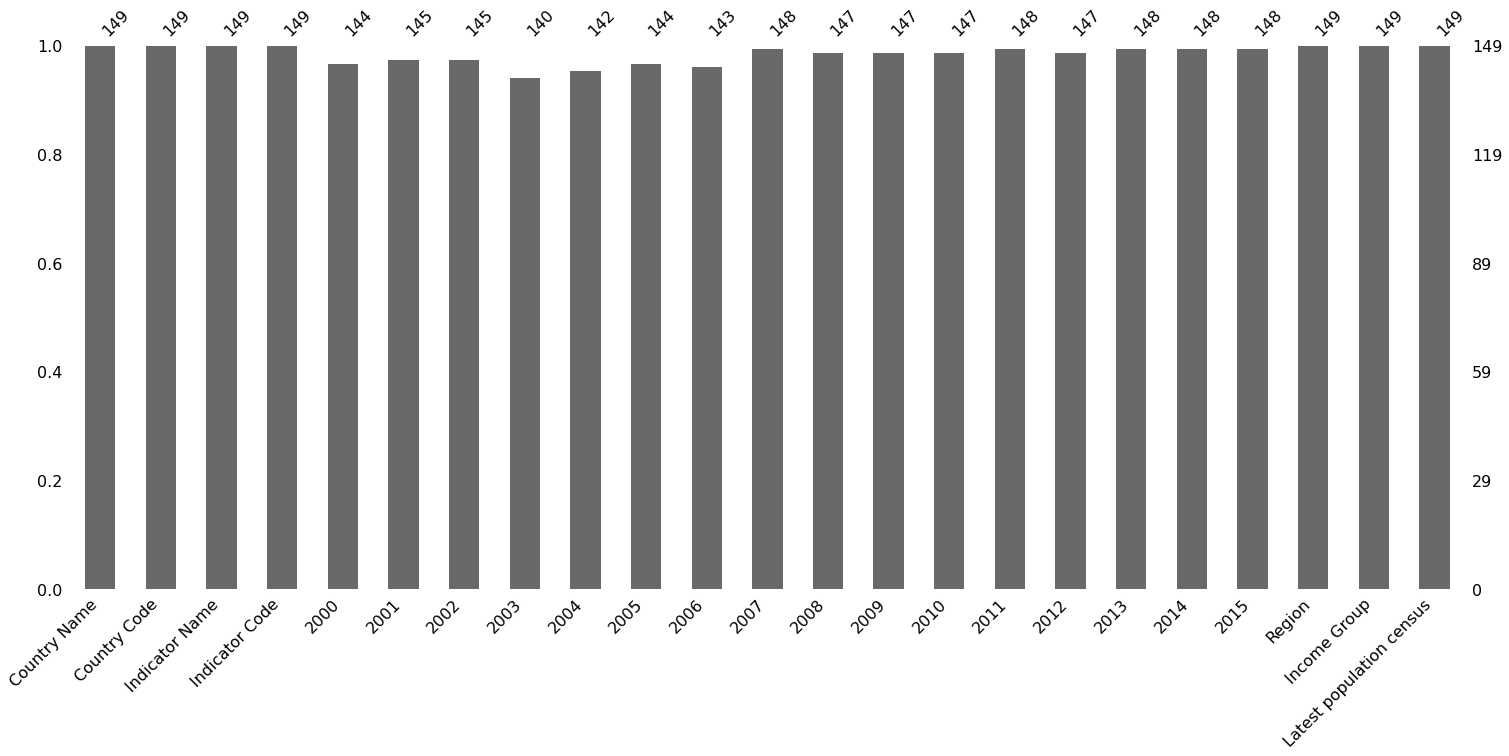

In [747]:
msno.bar(df_internet)

In [748]:
df_internet.describe()
## check the stat of all the years

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,144.000000,145.000000,145.000000,140.000000,142.000000,144.000000,143.000000,148.000000,147.000000,147.000000,147.000000,148.000000,147.000000,148.000000,148.000000,148.000000
mean,9.541256,11.674513,14.688956,17.664522,20.154159,22.521247,25.350786,27.693984,30.574015,33.412657,36.862978,39.399425,42.491051,45.245666,48.110623,51.140419
std,14.158403,16.473860,19.660347,21.878048,23.374451,24.694919,25.770270,26.810823,27.643437,28.209917,28.414923,28.679520,29.048296,29.332522,28.944141,28.294936
min,0.020000,0.004723,0.004561,0.064584,0.077480,0.221341,0.294034,0.390391,0.470000,0.530000,0.610000,0.700000,0.800000,0.900000,0.990000,1.083733
25%,0.380223,0.597568,1.083943,1.771622,2.595366,3.323271,4.349961,5.212500,6.700000,7.900000,10.980000,12.295000,15.060000,16.375000,20.735612,24.875000
50%,2.687008,3.430887,4.910446,7.131717,8.697186,11.245231,15.224711,18.200000,22.600000,27.200000,31.590000,37.307454,40.301895,44.065000,47.250000,53.722490
75%,10.538891,15.038634,21.150000,27.495000,31.642500,37.840235,44.240000,48.246047,54.175000,58.915000,62.660000,66.647500,68.824987,71.458750,73.435428,74.832862
max,52.000000,64.000000,79.120000,83.140000,83.890000,87.000000,89.510000,90.600000,91.000000,93.000000,93.390000,94.819687,96.209800,96.546800,98.160000,98.323610


In [749]:
df_internet.head(4)

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Region,Income Group,Latest population census
1375,Afghanistan,AFG,Internet users (per 100 people),IT.NET.USER.P2,NaN,0.004723,0.004561,0.087891,0.105809,1.224148,2.107124,1.900000,1.84,3.55,4.0,5.0,5.454545,5.9,7.0,8.260000,South Asia,Low income,1979
5040,Albania,ALB,Internet users (per 100 people),IT.NET.USER.P2,0.114097,0.325798,0.390081,0.971900,2.420388,6.043891,9.609991,15.036115,23.86,41.20,45.0,49.0,54.655959,57.2,60.1,63.252933,Europe & Central Asia,Upper middle income,2011
8705,Algeria,DZA,Internet users (per 100 people),IT.NET.USER.P2,0.491706,0.646114,1.591641,2.195360,4.634475,5.843942,7.375985,9.451191,10.18,11.23,12.5,14.9,18.200000,22.5,29.5,38.200000,Middle East & North Africa,Upper middle income,2008
12370,Andorra,AND,Internet users (per 100 people),IT.NET.USER.P2,10.538836,NaN,11.260469,13.546413,26.837954,37.605766,48.936847,70.870000,70.04,78.53,81.0,81.0,86.434425,94.0,95.9,96.910000,Europe & Central Asia,High income: nonOECD,2011. Population figures compiled from adminis...


### check the evolution by country over year for mean of the 10 first countries

In [750]:

df_internet["mean internet"] = df_internet.iloc[:,4:20].mean(axis = 1) 
# create one column with the sum of all mean years 

C:\Users\naoue\AppData\Local\Temp\ipykernel_23132\1941183772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_internet["mean internet"] = df_internet.iloc[:,4:20].mean(axis = 1)


In [751]:
#df_internet_mean = df_internet.reset_index(level = 0) 
## transform the index to a column name to use it later for sorting values by values of each country

In [752]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 1375 to 543795
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Name              149 non-null    object 
 1   Country Code              149 non-null    object 
 2   Indicator Name            149 non-null    object 
 3   Indicator Code            149 non-null    object 
 4   2000                      144 non-null    float64
 5   2001                      145 non-null    float64
 6   2002                      145 non-null    float64
 7   2003                      140 non-null    float64
 8   2004                      142 non-null    float64
 9   2005                      144 non-null    float64
 10  2006                      143 non-null    float64
 11  2007                      148 non-null    float64
 12  2008                      147 non-null    float64
 13  2009                      147 non-null    float64
 14  2010

<Figure size 720x432 with 0 Axes>

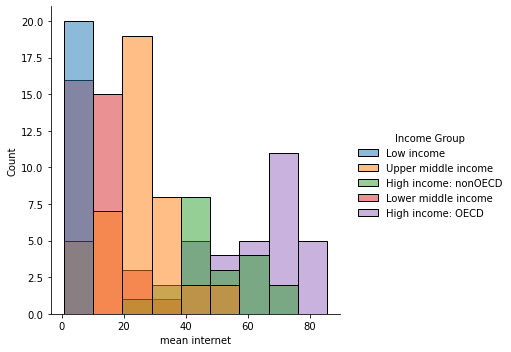

In [753]:
plt.figure(figsize = (10,6) )
sns.displot(df_internet, x="mean internet", hue="Income Group")

## check evolution of indicator internet per year for 5 first countries

In [754]:
 x = df_internet.sort_values(['2000', '2001', '2002', '2003','2004' ,'2005', '2006','2007', '2008', '2009',
    '2010', '2011', '2012', '2013', '2014'],ascending=False).columns[4:20]

In [755]:
x

Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'],
      dtype='object')

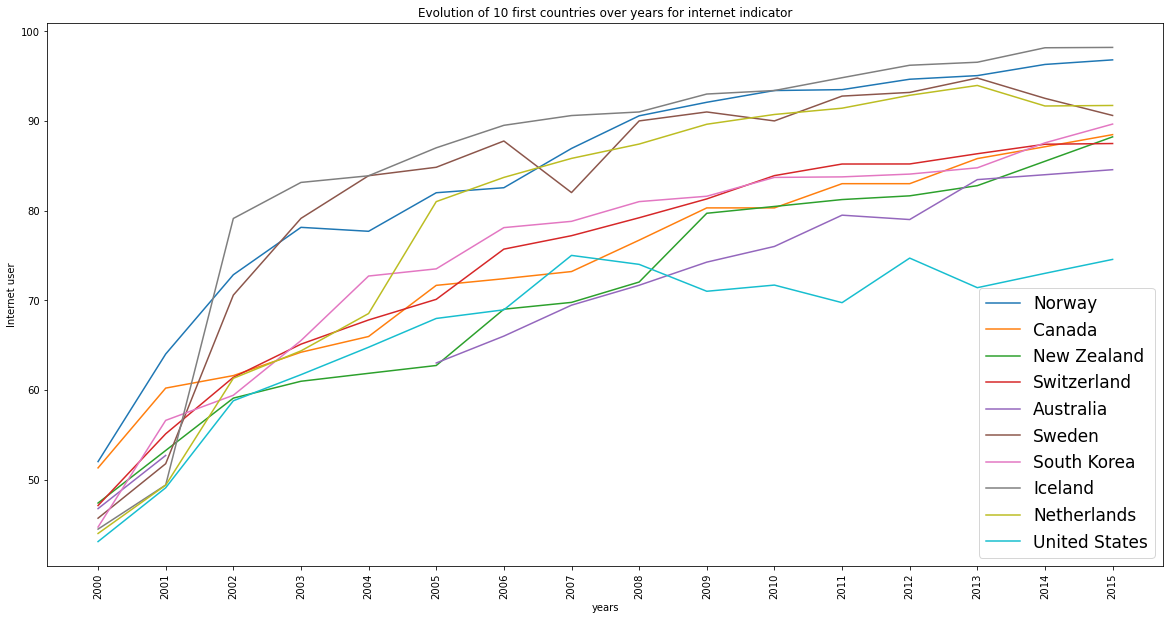

In [756]:
plt.figure(figsize=(20,10))
for index in range(10):
    y = df_internet.sort_values(['2000', '2001', '2002', '2003','2004' ,'2005', '2006','2007', '2008', '2009',
    '2010', '2011', '2012', '2013', '2014'],ascending=False).iloc[index][4:20]
    plt.plot(x, 
             y, 
             label = df_internet.sort_values(['2000', '2001', '2002', '2003','2004' ,'2005','2006',
             '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014'],                                    
                                                  ascending=False).iloc[index][0])
    plt.title('Evolution of 10 first countries over years for internet indicator')
    plt.xlabel('years')
    plt.xticks(rotation = '90')
    plt.ylabel('Internet user')
    plt.legend(prop = {'size': 17})

### check ten last countries 

In [757]:
 x_two = df_internet.sort_values(['2000', '2001', '2002', '2003','2004' ,'2005', '2006','2007', '2008', '2009',
    '2010', '2011', '2012', '2013', '2014'],ascending=True).columns[4:20]

In [758]:
x_two

Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'],
      dtype='object')

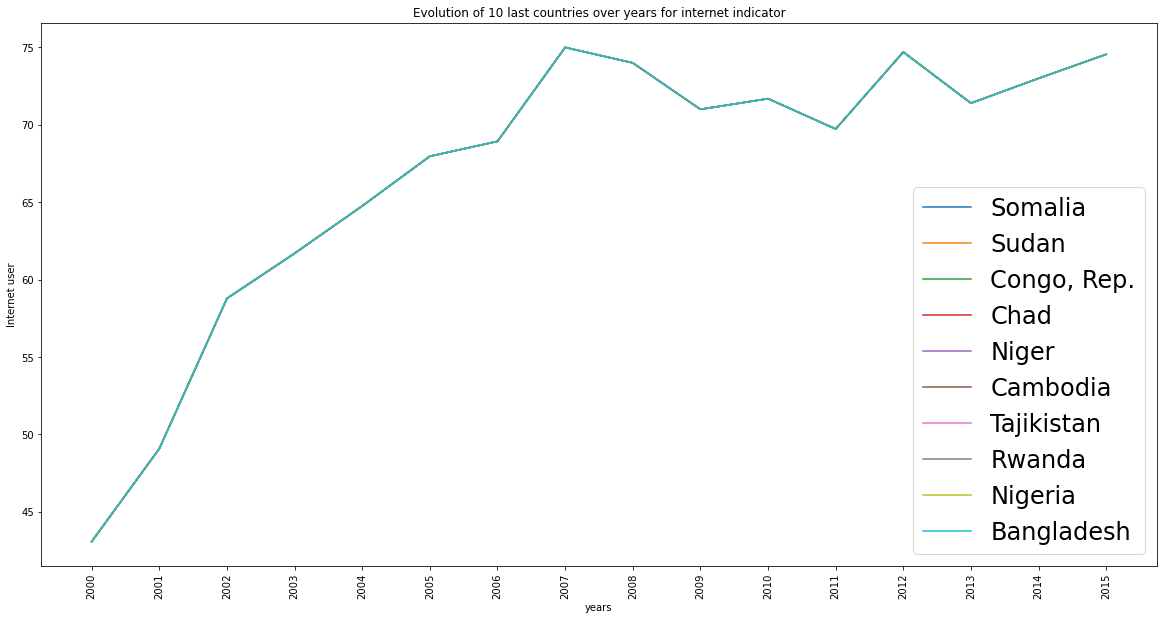

In [759]:
plt.figure(figsize=(20,10))
for index in range(10):
    y_two = df_internet.sort_values(['2000', '2001', '2002', '2003','2004' ,'2005', '2006','2007', '2008', '2009',
    '2010', '2011', '2012', '2013', '2014'],ascending=True).iloc[index][4:20]
    plt.plot(x, 
             y, 
             label = df_internet.sort_values(['2000', '2001', '2002', '2003','2004' ,'2005','2006',
             '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014'],                                    
                                                  ascending=True).iloc[index][0])
    plt.title('Evolution of 10 last countries over years for internet indicator')
    plt.xlabel('years')
    plt.xticks(rotation = '90')
    plt.ylabel('Internet user')
    plt.legend(prop = {'size': 24})

## check ten first countries

In [760]:
top_ten_internet = df_internet.sort_values("mean internet", ascending= False).head(10)
# sort values and check the ten firt and ten last countries

<BarContainer object of 10 artists>

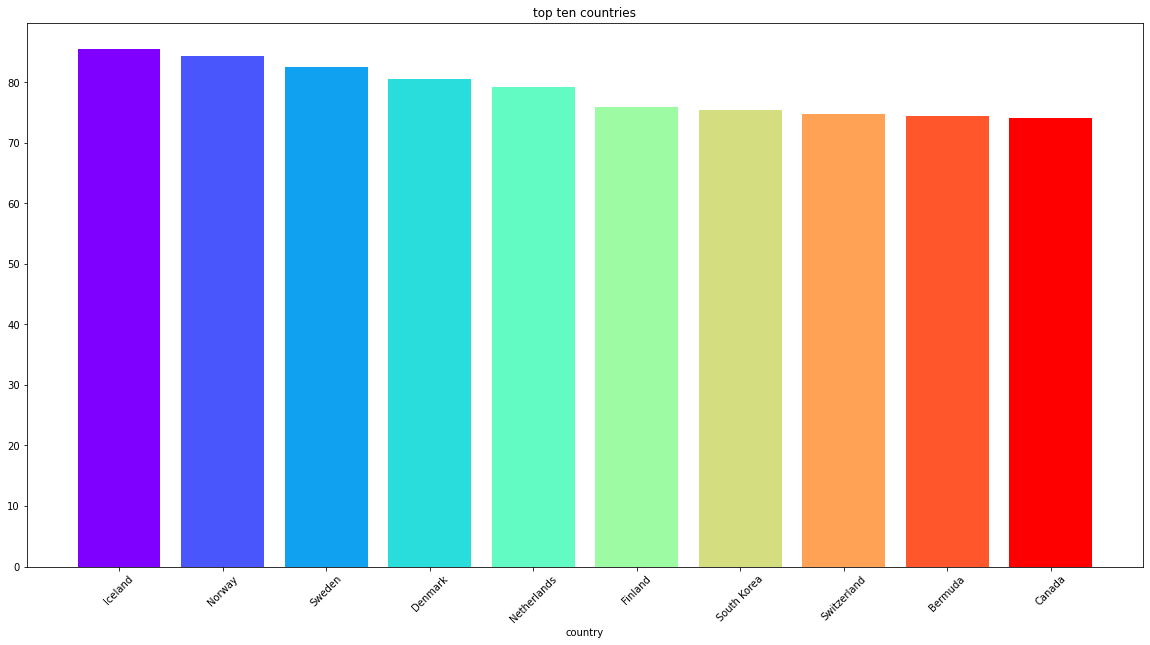

In [761]:
plt.figure(figsize=(20,10))
plt.xticks(rotation = '45')
plt.title("top ten countries")
plt.xlabel('country')
#plt.ylabel('mean internet')
plt.bar(top_ten_internet['Country Name'],
        top_ten_internet['mean internet'],
        color = cm.rainbow(np.linspace(0, 1, len(top_ten_internet))))

## check ten last countries

In [762]:
last_ten_internet = df_internet.sort_values("mean internet", ascending= False).tail(10)

<BarContainer object of 10 artists>

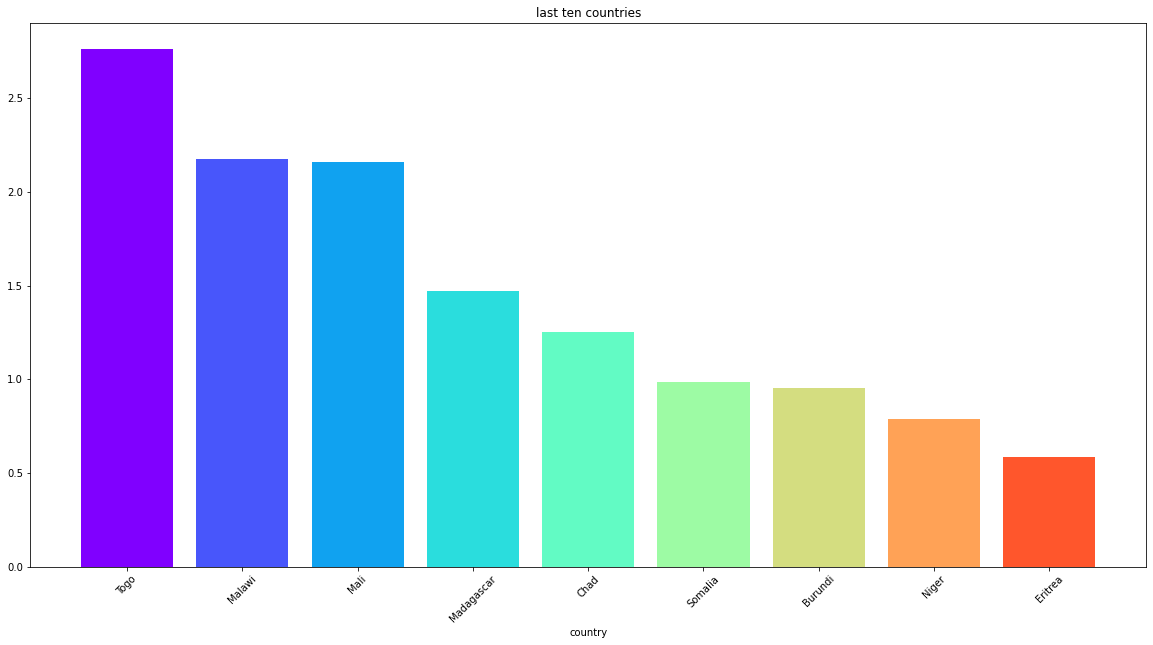

In [763]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = '45')
plt.title("last ten countries")
plt.xlabel('country')
#plt.ylabel('mean internet')
plt.bar(last_ten_internet['Country Name'],
        last_ten_internet['mean internet'],
        color = cm.rainbow(np.linspace(0, 1, len(last_ten_internet))))

In [764]:
df_internet = df_internet.drop(columns=[ 'Country Code', 'Indicator Name', 'Indicator Code',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', 'Region',
       'Income Group', 'Latest population census'],axis = 0)

In [765]:
df_internet.columns

Index(['Country Name', 'mean internet'], dtype='object')

## 2)Personal computers 

In [767]:
df_computer = df_indicator.loc[df_indicator["Indicator Name"] == "Personal computers (per 100 people)"]
#create dataframe with one indicator

In [768]:
df_computer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 2084 to 544504
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Name              149 non-null    object 
 1   Country Code              149 non-null    object 
 2   Indicator Name            149 non-null    object 
 3   Indicator Code            149 non-null    object 
 4   2000                      130 non-null    float64
 5   2001                      139 non-null    float64
 6   2002                      138 non-null    float64
 7   2003                      135 non-null    float64
 8   2004                      135 non-null    float64
 9   2005                      131 non-null    float64
 10  2006                      82 non-null     float64
 11  2007                      39 non-null     float64
 12  2008                      25 non-null     float64
 13  2009                      3 non-null      float64
 14  2010

In [769]:
df_computer.isnull().sum()/df_computer.shape[0]*100 
# percentage of null in every column

Country Name                  0.000000
Country Code                  0.000000
Indicator Name                0.000000
Indicator Code                0.000000
2000                         12.751678
2001                          6.711409
2002                          7.382550
2003                          9.395973
2004                          9.395973
2005                         12.080537
2006                         44.966443
2007                         73.825503
2008                         83.221477
2009                         97.986577
2010                        100.000000
2011                        100.000000
2012                        100.000000
2013                        100.000000
2014                        100.000000
2015                        100.000000
Region                        0.000000
Income Group                  0.000000
Latest population census      0.000000
dtype: float64

Text(0.5, 1.0, 'Personal computer missing data')

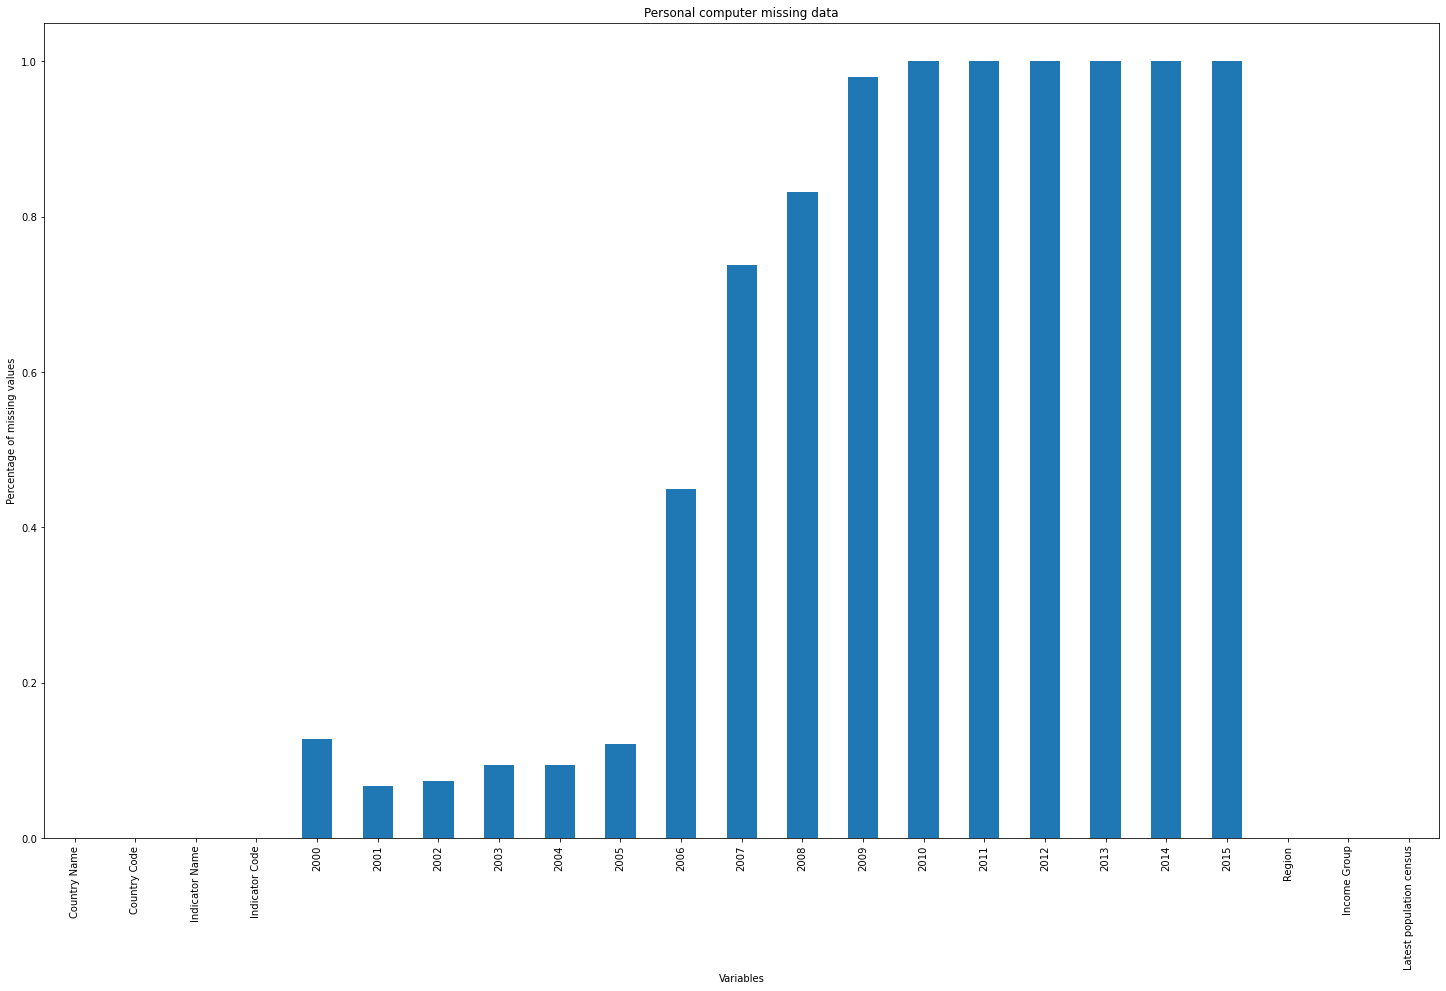

In [770]:
## percentage of nan  missing values colored in blue
#(df_computer.isnull().sum()/df_computer.shape[0]*100) .plot.bar(figsize=(25,15))
(df_computer.isnull().mean()) .plot.bar(figsize=(25,15))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Personal computer missing data')

<AxesSubplot:>

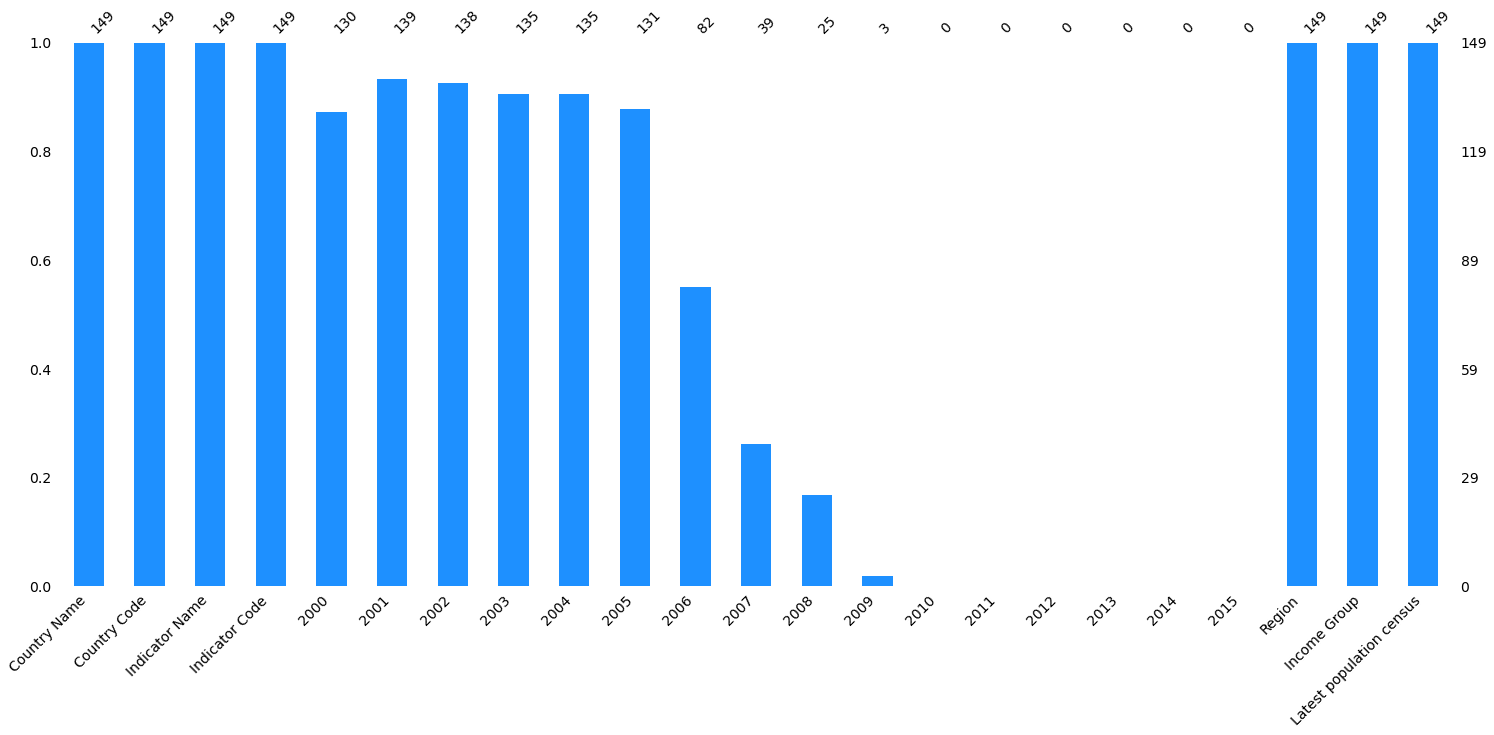

In [771]:
msno.bar(df_computer,color="dodgerblue", fontsize=14) ## missing valus are the white part 

In [772]:
# drop column with more then 50 % null values
df_computer = df_computer.drop(['2007','2008','2009','2015','2014','2013','2012','2011','2010'], axis = 1)

In [773]:
df_computer.describe()

,2000,2001,2002,2003,2004,2005,2006
count,130.000000,139.000000,138.000000,135.000000,135.000000,131.000000,82.000000
mean,11.411923,11.802944,12.483240,13.842111,15.420095,17.104072,24.310784
std,15.631643,16.564796,17.318817,18.490147,20.876012,22.983051,27.232820
min,0.045497,0.052648,0.059235,0.065285,0.070817,0.075851,0.289827
25%,0.905169,0.960641,1.120163,1.553450,1.702756,1.797155,3.760417
50%,3.855607,3.644828,3.980558,4.698760,5.514830,6.687338,12.707212
75%,14.306892,14.485995,14.946086,18.230840,18.901746,20.205328,39.545342
max,65.591332,68.603650,71.255847,74.495008,83.122328,87.728023,94.446705


In [774]:
#df_computer_mean = df_computer.groupby("Country Name").mean()
# group by country name and create a new data frame

In [775]:
df_computer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 2084 to 544504
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Name              149 non-null    object 
 1   Country Code              149 non-null    object 
 2   Indicator Name            149 non-null    object 
 3   Indicator Code            149 non-null    object 
 4   2000                      130 non-null    float64
 5   2001                      139 non-null    float64
 6   2002                      138 non-null    float64
 7   2003                      135 non-null    float64
 8   2004                      135 non-null    float64
 9   2005                      131 non-null    float64
 10  2006                      82 non-null     float64
 11  Region                    149 non-null    object 
 12  Income Group              149 non-null    object 
 13  Latest population census  149 non-null    object 
dtypes: f

In [776]:
df_computer["mean computer"] = df_computer.iloc[:,4:11].mean(axis = 1) 
# create a new column with mean values of all years for each country

In [777]:
df_computer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 2084 to 544504
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Name              149 non-null    object 
 1   Country Code              149 non-null    object 
 2   Indicator Name            149 non-null    object 
 3   Indicator Code            149 non-null    object 
 4   2000                      130 non-null    float64
 5   2001                      139 non-null    float64
 6   2002                      138 non-null    float64
 7   2003                      135 non-null    float64
 8   2004                      135 non-null    float64
 9   2005                      131 non-null    float64
 10  2006                      82 non-null     float64
 11  Region                    149 non-null    object 
 12  Income Group              149 non-null    object 
 13  Latest population census  149 non-null    object 
 14  mean

<Figure size 720x432 with 0 Axes>

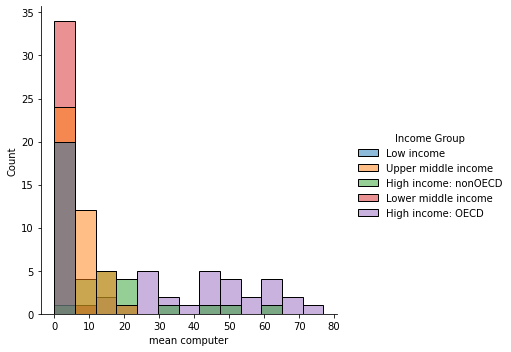

In [778]:
plt.figure(figsize = (10,6) )
sns.displot(df_computer, x="mean computer", hue="Income Group")

## check evolution of indicator personel computer per year for 5 first countries

In [779]:
x = df_computer.sort_values(['2000', '2001', '2002', '2003','2004' ,'2005', '2006'],ascending= False).columns[4:11]
#y = df_computer_mean.sort_values(['2000', '2001', '2002', '2003','2004' ,'2005', '2006'],ascending= False).iloc[0][1:]
#country = df_computer_mean.sort_values(['2000', '2001', '2002', '2003','2004' ,'2005', '2006'],ascending= False).iloc[0][0]

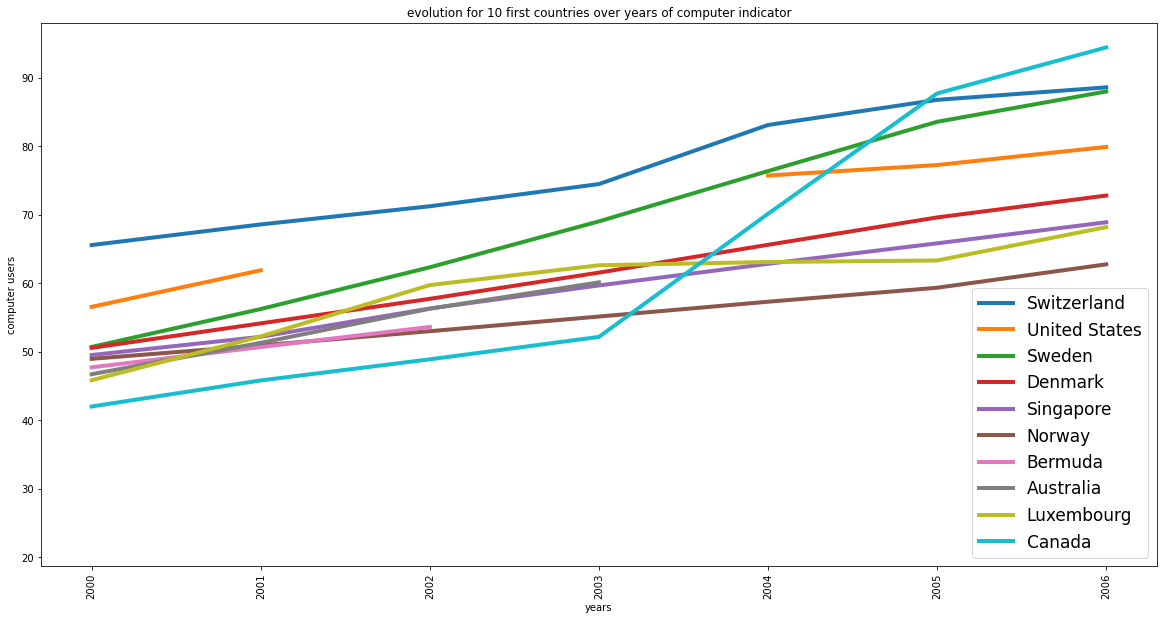

In [780]:
plt.figure(figsize = (20,10))
for index in range(10):

    y = df_computer.sort_values(['2000', '2001', '2002', '2003','2004' ,'2005', '2006'],
                                     ascending=False).iloc[index][4:11]
    plt.plot(x, 
             y, 
             label = df_computer.sort_values(['2000', '2001', '2002', '2003','2004' ,'2005','2006'],
                                                  ascending=False).iloc[index][0],
             linewidth = 4)
    plt.title('evolution for 10 first countries over years of computer indicator')
    plt.xlabel('years')
    plt.xticks(rotation = '90')
    plt.ylabel('computer users')
    plt.legend(prop = {'size': 17})

## check the ten first and ten last countries

In [781]:
top_ten_computer= df_computer.sort_values("mean computer", ascending= False).head(10)
# sort values and check the ten firt and ten last countries

<BarContainer object of 10 artists>

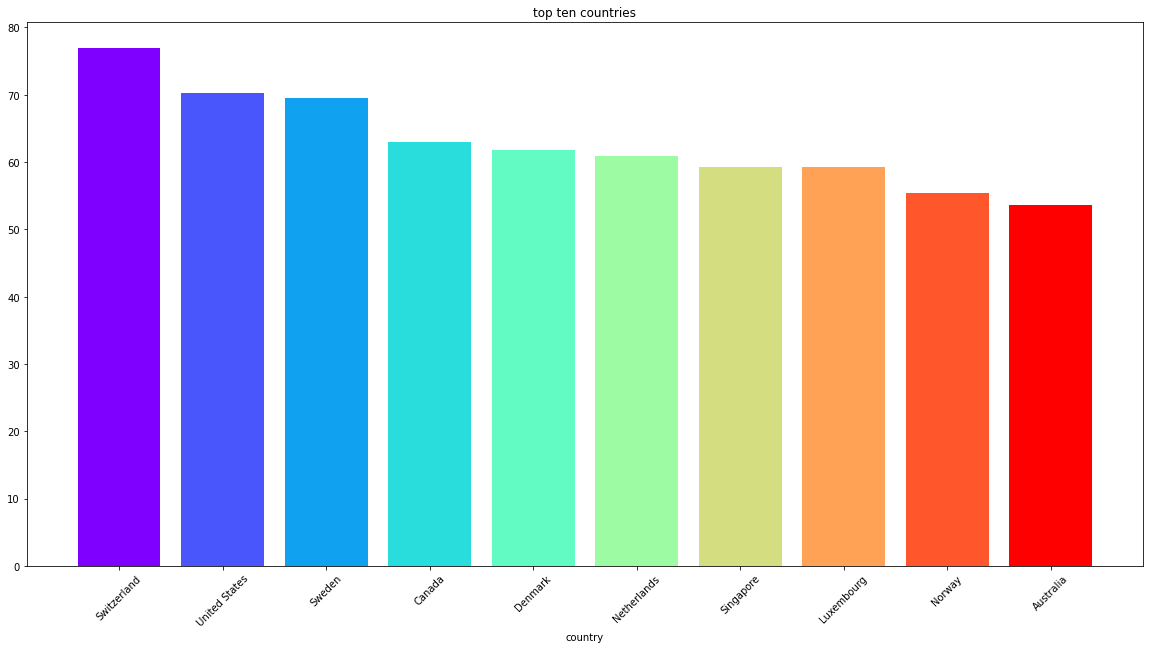

In [782]:
plt.figure(figsize=(20,10))
plt.xticks(rotation = '45')
plt.title("top ten countries")
plt.xlabel('country')
#plt.ylabel('mean internet')
plt.bar(top_ten_computer['Country Name'],
        top_ten_computer['mean computer'],
        color = cm.rainbow(np.linspace(0, 1, len(top_ten_computer))))

In [783]:
last_ten_computer= df_computer.sort_values("mean computer", ascending= False).tail(14)

<BarContainer object of 14 artists>

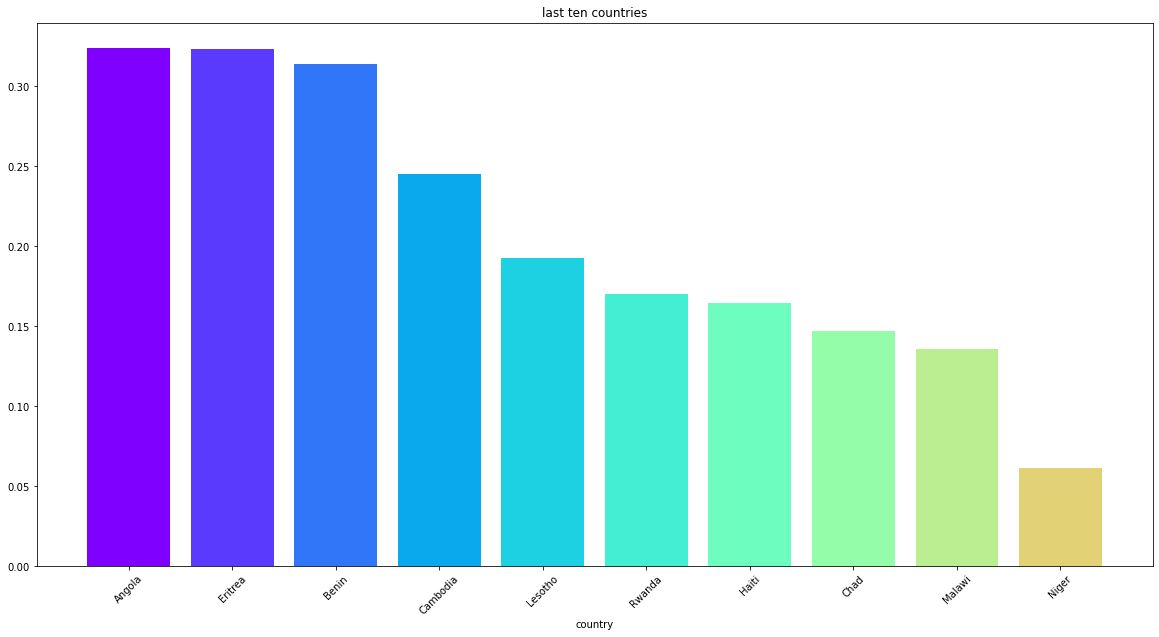

In [784]:
plt.figure(figsize=(20,10))
plt.xticks(rotation = '45')
plt.title("last ten countries")
plt.xlabel('country')
#plt.ylabel('mean internet')
plt.bar(last_ten_computer['Country Name'],
        last_ten_computer['mean computer'],
        color = cm.rainbow(np.linspace(0, 1, len(last_ten_computer))))

In [785]:
df_computer = df_computer.drop(columns=['2000', '2001', '2002', '2003','2004','2005', '2006','Country Code', 'Indicator Name', 'Indicator Code',
       'Region', 'Income Group', 'Latest population census'],axis = 1)
# keep just mean column 

In [786]:
df_computer.columns

Index(['Country Name', 'mean computer'], dtype='object')

## 3)Percentage of enrolment in upper secondary education in private institutions 

In [787]:
df_indicator["Indicator Name"].value_counts()

Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary    149
GDP per capita (current US$)                                                                 149
Internet users (per 100 people)                                                              149
Percentage of enrolment in secondary education in private institutions (%)                   149
Percentage of enrolment in tertiary education in private institutions (%)                    149
Percentage of enrolment in upper secondary education in private institutions (%)             149
Personal computers (per 100 people)                                                          149
Name: Indicator Name, dtype: int64

In [788]:
# create datframe with one indicator
df_upper_private = df_indicator.loc[df_indicator["Indicator Name"] == "Percentage of enrolment in upper secondary education in private institutions (%)"]

In [789]:
df_upper_private.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 1858 to 544278
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Name              149 non-null    object 
 1   Country Code              149 non-null    object 
 2   Indicator Name            149 non-null    object 
 3   Indicator Code            149 non-null    object 
 4   2000                      78 non-null     float64
 5   2001                      82 non-null     float64
 6   2002                      93 non-null     float64
 7   2003                      89 non-null     float64
 8   2004                      91 non-null     float64
 9   2005                      94 non-null     float64
 10  2006                      101 non-null    float64
 11  2007                      99 non-null     float64
 12  2008                      102 non-null    float64
 13  2009                      101 non-null    float64
 14  2010

In [790]:
df_upper_private.isnull().sum()/df_upper_private.shape[0]*100  # percentage of null in every column

Country Name                 0.000000
Country Code                 0.000000
Indicator Name               0.000000
Indicator Code               0.000000
2000                        47.651007
2001                        44.966443
2002                        37.583893
2003                        40.268456
2004                        38.926174
2005                        36.912752
2006                        32.214765
2007                        33.557047
2008                        31.543624
2009                        32.214765
2010                        28.187919
2011                        24.832215
2012                        28.187919
2013                        26.845638
2014                        42.281879
2015                        97.986577
Region                       0.000000
Income Group                 0.000000
Latest population census     0.000000
dtype: float64

Text(0.5, 1.0, 'Personal computer missing data')

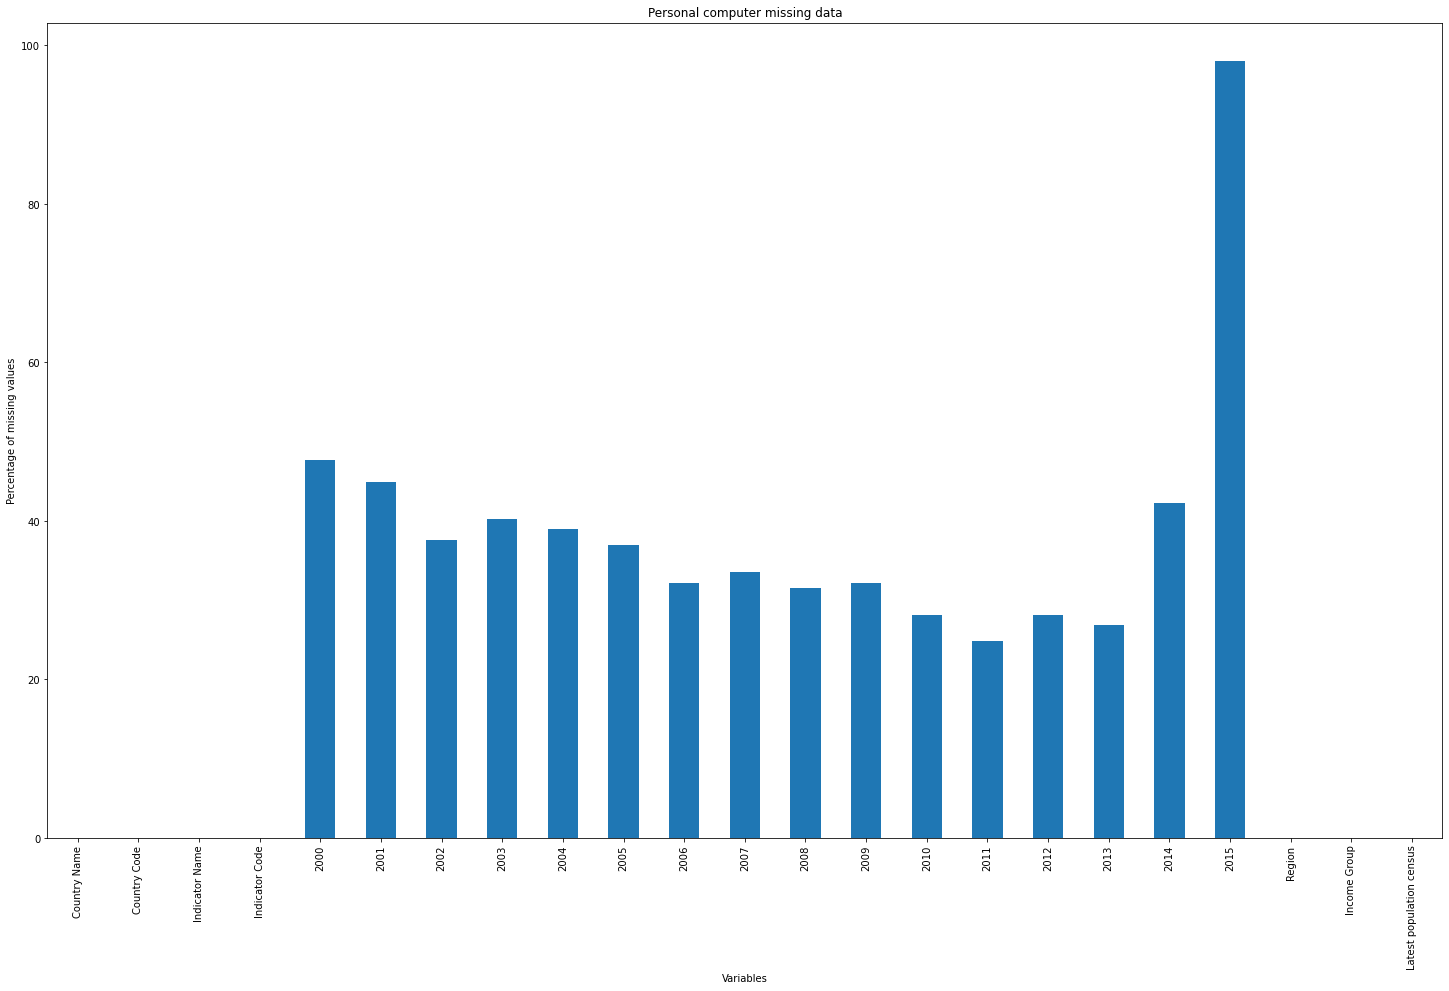

In [791]:
## percentage of nan  missing values colored in blue
(df_upper_private.isnull().sum()/df_upper_private.shape[0]*100) .plot.bar(figsize=(25,15))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Personal computer missing data')

In [792]:
# drop 2015 column over 50 % of null values
df_upper_private = df_upper_private.drop(['2015'], axis = 1)

In [793]:
df_upper_private.describe()
## check the mean of all the years

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
count,78.000000,82.000000,93.000000,89.000000,91.000000,94.000000,101.000000,99.000000,102.000000,101.000000,107.000000,112.000000,107.000000,109.000000,86.000000
mean,16.950716,18.545831,18.184026,16.330146,17.563186,18.015857,19.764452,19.502140,19.304285,19.990500,19.612231,19.661577,20.366913,20.506961,21.373568
std,18.501782,19.116309,18.672969,16.949912,17.756589,18.243100,18.770902,19.391729,18.515142,19.114328,18.318471,18.321340,17.882087,18.778918,18.425212
min,0.210720,0.058400,0.104170,0.168470,0.277410,0.222370,0.322410,0.233710,0.247800,0.250240,0.094070,0.314200,0.374320,0.341860,0.325470
25%,5.555930,4.432750,4.096440,3.117990,5.167595,4.690593,5.820250,4.775235,4.569148,4.854620,5.910790,4.817830,6.329645,6.222410,6.625600
50%,10.442815,11.370005,11.850670,9.960600,12.507630,12.162015,13.409130,13.157560,14.608120,15.365810,14.477230,14.859870,15.302100,15.294570,17.130105
75%,24.492825,26.331110,27.263950,25.990320,24.346390,26.619562,29.919241,27.550010,27.590710,27.970381,28.736595,29.164377,30.620725,28.997841,30.954288
max,92.970490,93.088623,93.377060,93.086533,92.558083,93.146759,92.911003,92.494476,91.897888,92.048332,90.594521,90.879623,90.232941,90.423538,76.587387


In [794]:
df_upper_private["mean upper"] = df_upper_private.iloc[:,4:19].mean(axis = 1) 
# create one column with the sum of all mean years 

In [795]:
df_upper_private.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 1858 to 544278
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Name              149 non-null    object 
 1   Country Code              149 non-null    object 
 2   Indicator Name            149 non-null    object 
 3   Indicator Code            149 non-null    object 
 4   2000                      78 non-null     float64
 5   2001                      82 non-null     float64
 6   2002                      93 non-null     float64
 7   2003                      89 non-null     float64
 8   2004                      91 non-null     float64
 9   2005                      94 non-null     float64
 10  2006                      101 non-null    float64
 11  2007                      99 non-null     float64
 12  2008                      102 non-null    float64
 13  2009                      101 non-null    float64
 14  2010

<Figure size 720x432 with 0 Axes>

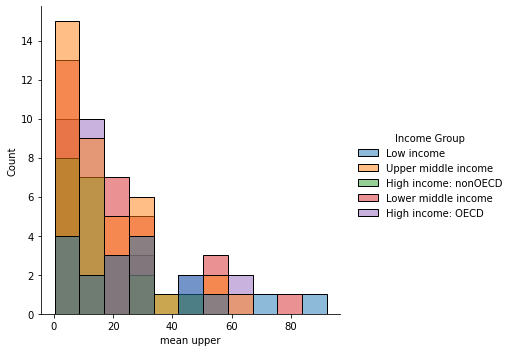

In [797]:
plt.figure(figsize = (10,6) )
sns.displot(df_upper_private, x="mean upper", hue="Income Group")

## check evolution for upper indicator for 5 first coutries over years

In [798]:
x = df_upper_private.sort_values(['2000', '2001', '2002', '2003','2004' ,'2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014'],ascending= False).columns[4:19]


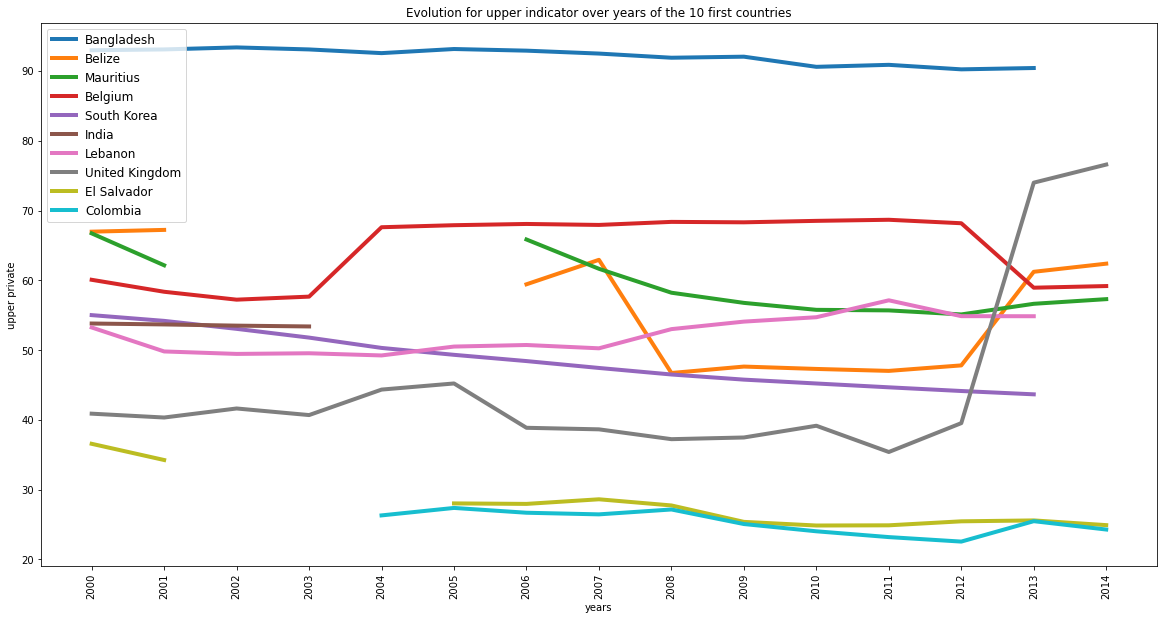

In [799]:
plt.figure(figsize = (20,10))
for index in range(10):
    y = df_upper_private.sort_values(['2000', '2001', '2002', '2003','2004' ,'2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014'],ascending=False).iloc[index][4:19]
    plt.plot(x, 
             y, 
             label = df_upper_private.sort_values(['2000', '2001', '2002', '2003','2004' ,'2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014'],ascending=False).iloc[index][0],
             linewidth = 4)
    plt.title("Evolution for upper indicator over years of the 10 first countries")
    plt.xlabel('years')
    plt.xticks(rotation = '90')
    plt.ylabel('upper private')
    plt.legend(prop= {'size':'12'})
    #prop = {'size': 24}

## check the ten first and ten last countries

In [800]:
top_ten_upper= df_upper_private.sort_values("mean upper", ascending= False).head(10)
# sort values and check the ten firt and ten last countries

<BarContainer object of 10 artists>

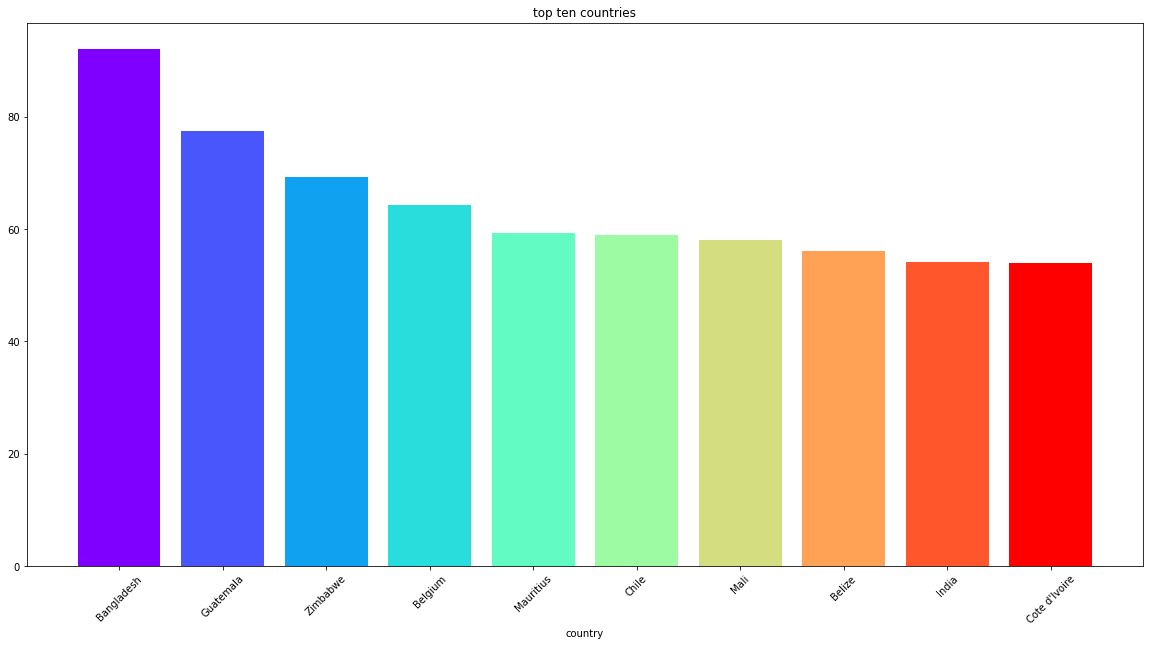

In [801]:
plt.figure(figsize=(20,10))
plt.xticks(rotation = '45')
plt.title("top ten countries")
plt.xlabel('country')
#plt.ylabel('mean internet')
plt.bar(top_ten_upper['Country Name'],
        top_ten_upper['mean upper'],
        color = cm.rainbow(np.linspace(0, 1, len(top_ten_upper))))

In [807]:
last_twenty_upper= df_upper_private.sort_values("mean upper", ascending= False).tail(21)

<BarContainer object of 21 artists>

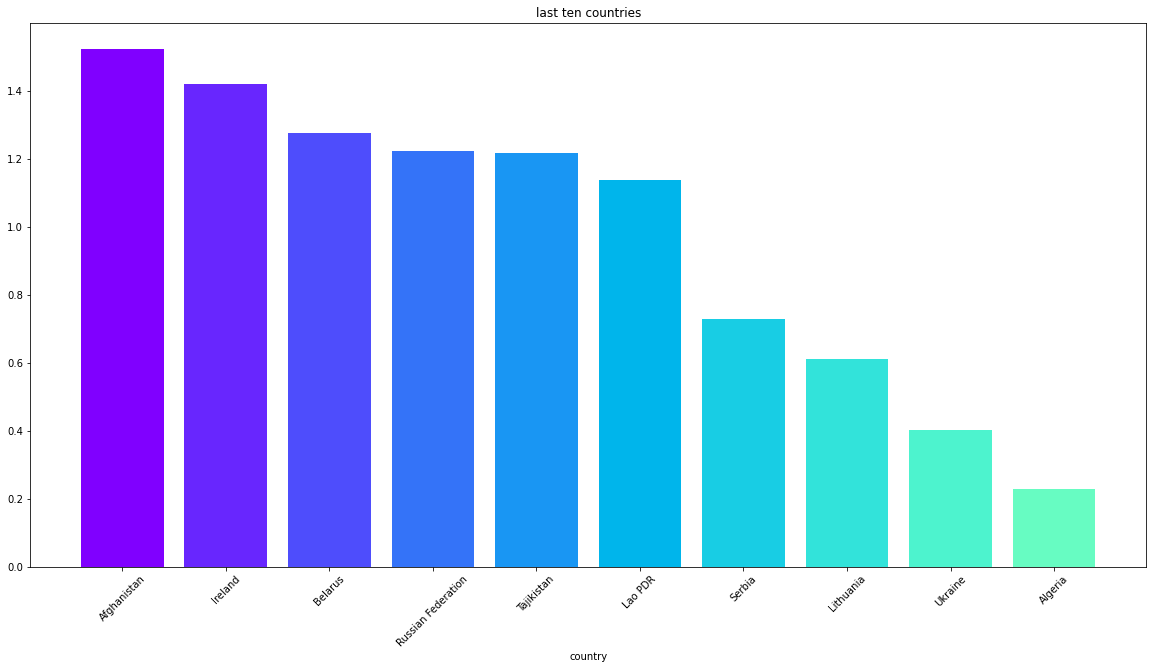

In [808]:
plt.figure(figsize=(20,10))
plt.xticks(rotation = '45')
plt.title("last ten countries")
plt.xlabel('country')
#plt.ylabel('mean internet')
plt.bar(last_twenty_upper['Country Name'],
        last_twenty_upper['mean upper'],
        color = cm.rainbow(np.linspace(0, 1, len(last_twenty_upper))))

In [809]:
df_upper_private = df_upper_private.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', 'Region',
       'Income Group', 'Latest population census'],axis = 1)
## keep just mean column

In [810]:
df_upper_private.columns

Index(['Country Name', 'mean upper'], dtype='object')

## 4)Percentage of enrolment in tertiary education in private institutions

In [811]:
df_indicator["Indicator Name"].value_counts()

Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary    149
GDP per capita (current US$)                                                                 149
Internet users (per 100 people)                                                              149
Percentage of enrolment in secondary education in private institutions (%)                   149
Percentage of enrolment in tertiary education in private institutions (%)                    149
Percentage of enrolment in upper secondary education in private institutions (%)             149
Personal computers (per 100 people)                                                          149
Name: Indicator Name, dtype: int64

In [812]:
df_tertiary = df_indicator.loc[df_indicator["Indicator Name"] =="Percentage of enrolment in tertiary education in private institutions (%)"]

In [813]:
df_tertiary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 1857 to 544277
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Name              149 non-null    object 
 1   Country Code              149 non-null    object 
 2   Indicator Name            149 non-null    object 
 3   Indicator Code            149 non-null    object 
 4   2000                      54 non-null     float64
 5   2001                      54 non-null     float64
 6   2002                      63 non-null     float64
 7   2003                      64 non-null     float64
 8   2004                      71 non-null     float64
 9   2005                      68 non-null     float64
 10  2006                      68 non-null     float64
 11  2007                      73 non-null     float64
 12  2008                      82 non-null     float64
 13  2009                      85 non-null     float64
 14  2010

In [814]:
df_tertiary.isnull().sum()/df_tertiary.shape[0]*100  # percentage of null in every column

Country Name                 0.000000
Country Code                 0.000000
Indicator Name               0.000000
Indicator Code               0.000000
2000                        63.758389
2001                        63.758389
2002                        57.718121
2003                        57.046980
2004                        52.348993
2005                        54.362416
2006                        54.362416
2007                        51.006711
2008                        44.966443
2009                        42.953020
2010                        42.281879
2011                        37.583893
2012                        41.610738
2013                        32.885906
2014                        35.570470
2015                        40.268456
Region                       0.000000
Income Group                 0.000000
Latest population census     0.000000
dtype: float64

<AxesSubplot:>

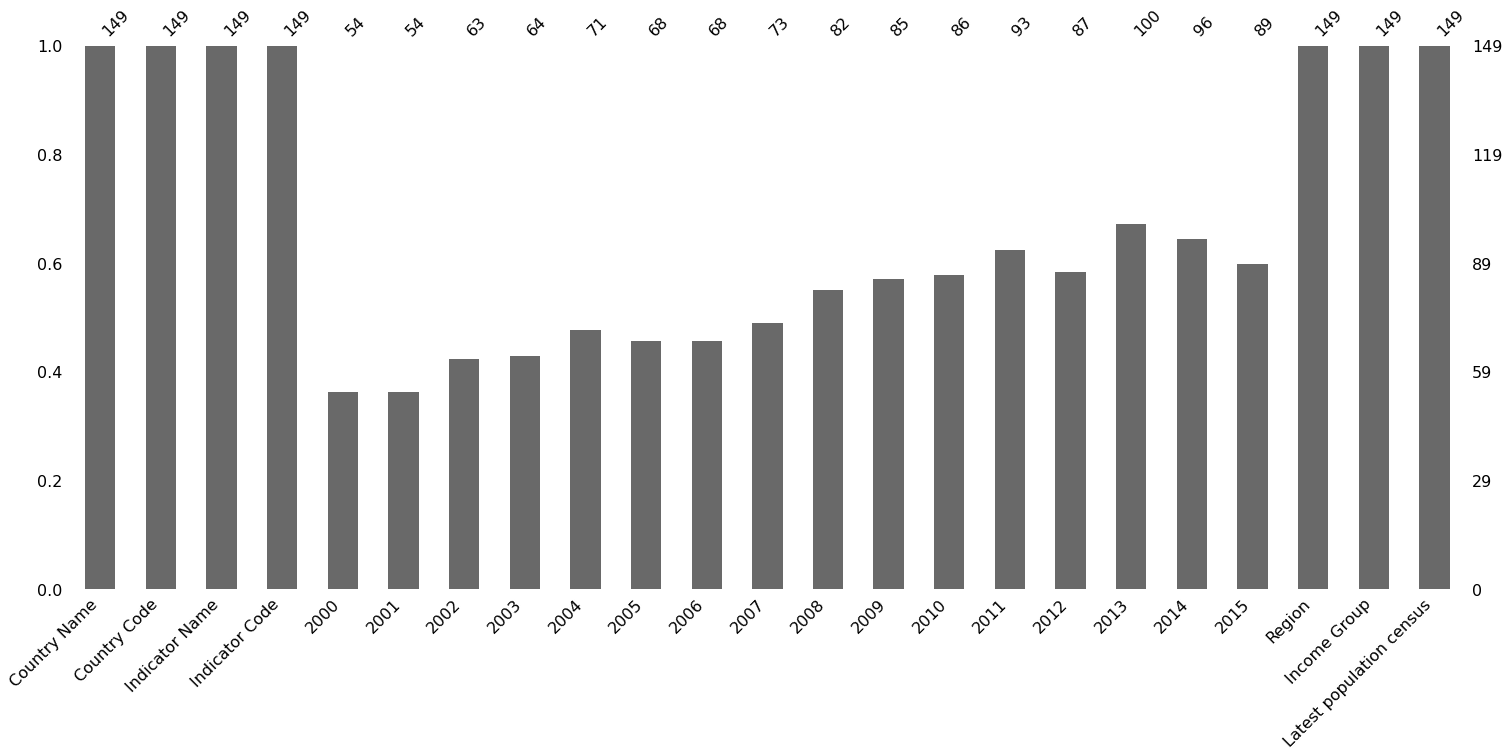

In [815]:
msno.bar(df_tertiary)

In [816]:
# drop coulmns with more then 50% of null values
df_tertiary = df_tertiary.drop(['2000','2001','2002','2003','2004','2005','2006'], axis = 1)

In [817]:
df_tertiary = df_tertiary.drop(['2007'], axis = 1)

In [818]:
df_tertiary.describe()## check the mean of all the years

,2008,2009,2010,2011,2012,2013,2014,2015
count,82.000000,85.000000,86.000000,93.000000,87.000000,100.000000,96.000000,89.000000
mean,33.209589,33.179550,34.186281,31.942985,32.947134,31.192275,29.997944,29.650124
std,26.029072,25.348595,27.201940,25.430546,27.200711,25.954741,24.488726,24.508723
min,0.659890,0.442120,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.539960,13.299910,13.599473,13.046040,13.456430,12.242987,12.067157,11.561820
50%,26.481625,26.858141,24.604375,23.101480,21.500999,20.083575,18.291470,17.452471
75%,44.135206,45.436321,46.026101,45.152489,47.676884,47.797647,43.855258,49.079460
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,92.160080


In [819]:
df_tertiary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 1857 to 544277
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Name              149 non-null    object 
 1   Country Code              149 non-null    object 
 2   Indicator Name            149 non-null    object 
 3   Indicator Code            149 non-null    object 
 4   2008                      82 non-null     float64
 5   2009                      85 non-null     float64
 6   2010                      86 non-null     float64
 7   2011                      93 non-null     float64
 8   2012                      87 non-null     float64
 9   2013                      100 non-null    float64
 10  2014                      96 non-null     float64
 11  2015                      89 non-null     float64
 12  Region                    149 non-null    object 
 13  Income Group              149 non-null    object 
 14  Late

In [820]:
df_tertiary["mean tertiary"]= df_tertiary.iloc[:,4:13].mean(axis = 1)

C:\Users\naoue\AppData\Local\Temp\ipykernel_23132\1268091250.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_tertiary["mean tertiary"]= df_tertiary.iloc[:,4:13].mean(axis = 1)


In [821]:
df_tertiary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 1857 to 544277
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Name              149 non-null    object 
 1   Country Code              149 non-null    object 
 2   Indicator Name            149 non-null    object 
 3   Indicator Code            149 non-null    object 
 4   2008                      82 non-null     float64
 5   2009                      85 non-null     float64
 6   2010                      86 non-null     float64
 7   2011                      93 non-null     float64
 8   2012                      87 non-null     float64
 9   2013                      100 non-null    float64
 10  2014                      96 non-null     float64
 11  2015                      89 non-null     float64
 12  Region                    149 non-null    object 
 13  Income Group              149 non-null    object 
 14  Late

<Figure size 720x432 with 0 Axes>

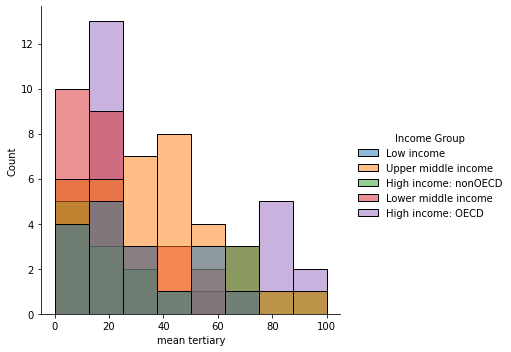

In [822]:
plt.figure(figsize = (10,6) )
sns.displot(df_tertiary, x="mean tertiary", hue="Income Group")

## check evolution for tetiary indicator for 5 first coutries over years

In [826]:
x = df_tertiary.sort_values(['2008', '2009',
       '2010', '2011', '2012', '2013', '2014','2015'],ascending= False).columns[4:12]


In [827]:
x

Index(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'], dtype='object')

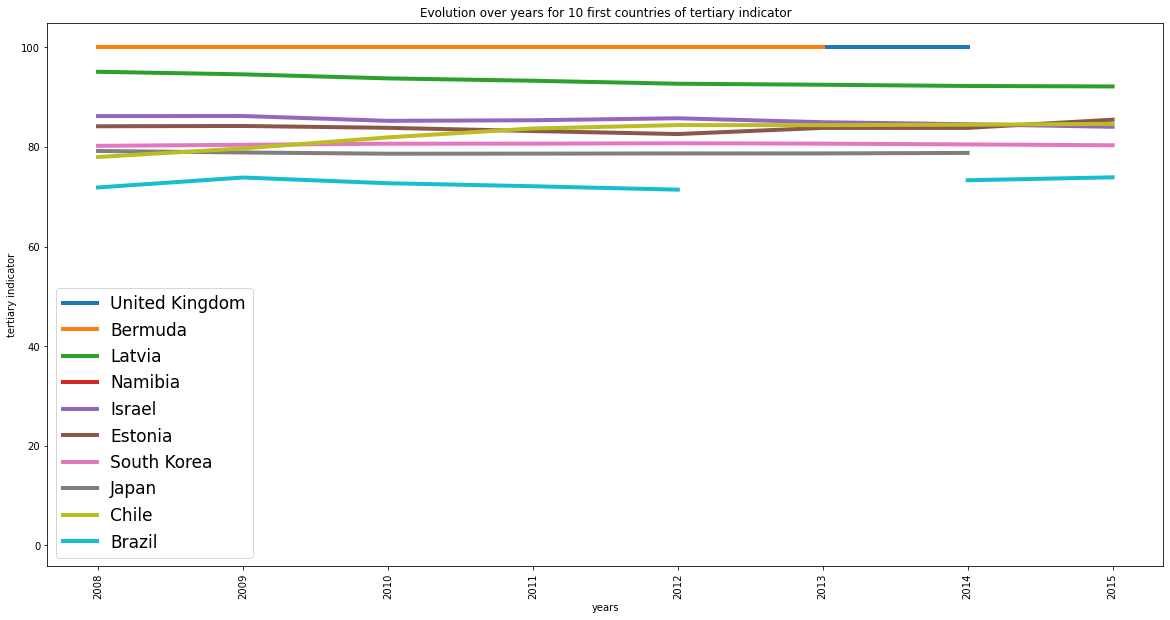

In [828]:
plt.figure(figsize=(20,10))
for index in range(10):
    y = df_tertiary.sort_values(['2008', '2009',
       '2010', '2011', '2012', '2013', '2014','2015'],ascending=False).iloc[index][4:12]
    plt.plot(x, 
             y, 
             label = df_tertiary.sort_values(['2008', '2009',
       '2010', '2011', '2012', '2013', '2014','2015'],ascending=False).iloc[index][0],
             linewidth = 4)
    plt.title("Evolution over years for 10 first countries of tertiary indicator")
    plt.xlabel('years')
    plt.xticks(rotation = '90')
    plt.ylabel('tertiary indicator')
    plt.legend(prop = {'size': 17})

## check the ten first and ten last countries

In [829]:
top_ten_tertiary= df_tertiary.sort_values("mean tertiary", ascending= False).head(10)
# sort values and check the ten firt and ten last countries

<BarContainer object of 10 artists>

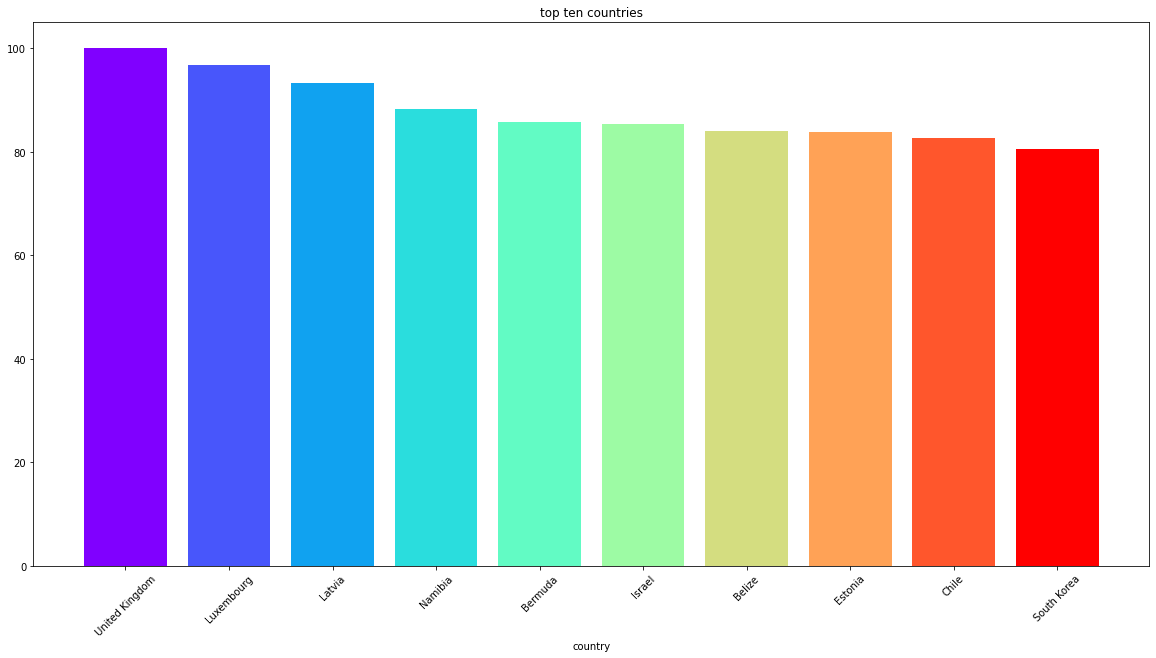

In [830]:
plt.figure(figsize=(20,10))
plt.xticks(rotation = '45')
plt.title("top ten countries")
plt.xlabel('country')
#plt.ylabel('mean internet')
plt.bar(top_ten_tertiary['Country Name'],
        top_ten_tertiary['mean tertiary'],
        color = cm.rainbow(np.linspace(0, 1, len(top_ten_tertiary))))

In [831]:
last_tertiary= df_tertiary.sort_values("mean tertiary", ascending= False).tail(30)

<BarContainer object of 30 artists>

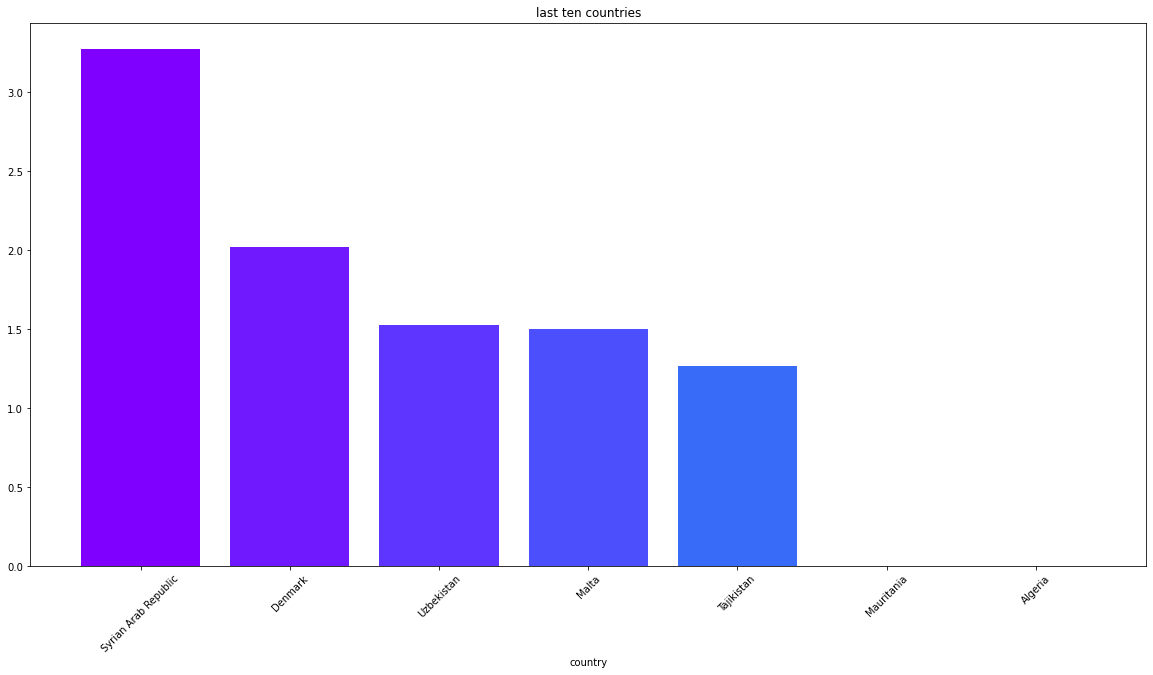

In [832]:
plt.figure(figsize=(20,10))
plt.xticks(rotation = '45')
plt.title("last ten countries")
plt.xlabel('country')
#plt.ylabel('mean internet')
plt.bar(last_tertiary['Country Name'],
        last_tertiary['mean tertiary'],
        color = cm.rainbow(np.linspace(0, 1, len(last_tertiary))))

In [834]:
df_tertiary = df_tertiary.drop(['Country Code', 'Indicator Name', 'Indicator Code',
 '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       'Region', 'Income Group', 'Latest population census'], axis = 1)

## 5)Percentage of enrolment in secondary education in private institutions

In [835]:
df_indicator["Indicator Name"].value_counts()

Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary    149
GDP per capita (current US$)                                                                 149
Internet users (per 100 people)                                                              149
Percentage of enrolment in secondary education in private institutions (%)                   149
Percentage of enrolment in tertiary education in private institutions (%)                    149
Percentage of enrolment in upper secondary education in private institutions (%)             149
Personal computers (per 100 people)                                                          149
Name: Indicator Name, dtype: int64

In [836]:
df_secondary = df_indicator.loc[df_indicator["Indicator Name"] =="Percentage of enrolment in secondary education in private institutions (%)"]

In [837]:
df_secondary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 1856 to 544276
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Name              149 non-null    object 
 1   Country Code              149 non-null    object 
 2   Indicator Name            149 non-null    object 
 3   Indicator Code            149 non-null    object 
 4   2000                      80 non-null     float64
 5   2001                      83 non-null     float64
 6   2002                      94 non-null     float64
 7   2003                      87 non-null     float64
 8   2004                      89 non-null     float64
 9   2005                      95 non-null     float64
 10  2006                      102 non-null    float64
 11  2007                      95 non-null     float64
 12  2008                      100 non-null    float64
 13  2009                      101 non-null    float64
 14  2010

In [838]:
df_secondary.isnull().sum()/df_secondary.shape[0]*100  # percentage of null in every column

Country Name                 0.000000
Country Code                 0.000000
Indicator Name               0.000000
Indicator Code               0.000000
2000                        46.308725
2001                        44.295302
2002                        36.912752
2003                        41.610738
2004                        40.268456
2005                        36.241611
2006                        31.543624
2007                        36.241611
2008                        32.885906
2009                        32.214765
2010                        29.530201
2011                        24.832215
2012                        29.530201
2013                        27.516779
2014                        30.201342
2015                        38.255034
Region                       0.000000
Income Group                 0.000000
Latest population census     0.000000
dtype: float64

<AxesSubplot:>

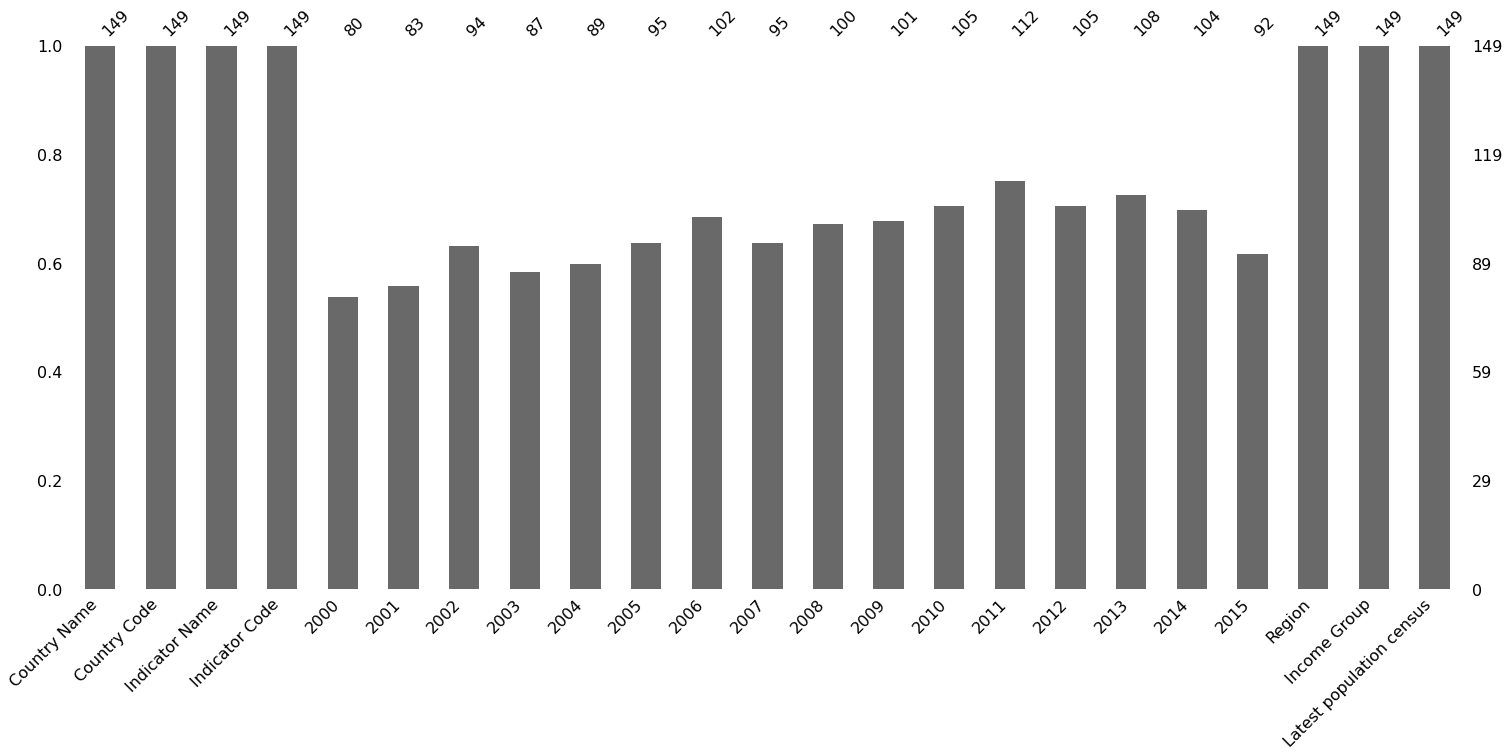

In [839]:
msno.bar(df_secondary)

In [840]:
df_secondary.describe()## check the mean of all the years

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,80.000000,83.000000,94.000000,87.000000,89.000000,95.000000,102.000000,95.000000,100.000000,101.000000,105.000000,112.000000,105.000000,108.000000,104.000000,92.000000
mean,16.185241,17.736753,16.932724,14.827483,16.144842,15.973626,17.466204,17.707991,18.103645,17.642871,17.832222,17.496138,18.076672,18.254153,18.601864,19.072458
std,18.148727,18.943989,18.559188,15.984079,16.974023,16.780459,18.018878,19.078000,18.325749,17.947646,17.636083,17.403724,18.198085,17.900695,17.853101,18.589796
min,0.000000,0.244080,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.169460,0.134480,0.077140,0.271400,0.000000,0.013610,0.040780,0.036650
25%,4.717075,4.494340,4.094985,3.350475,4.690370,4.386890,4.729090,4.248215,5.670838,5.660220,5.559830,4.767117,5.919230,6.195790,5.613445,5.823235
50%,10.074470,11.938230,11.143815,9.992140,10.903180,11.636910,12.766215,12.817010,13.209895,12.651250,13.253690,12.562690,13.305840,12.962550,12.902930,13.584900
75%,23.962630,25.061404,24.074232,22.487505,22.742041,23.997935,25.165628,25.213466,24.474192,22.954399,24.246040,24.496868,23.379629,24.074165,26.045733,28.548213
max,95.731720,95.895073,96.052803,95.915833,95.686783,95.991837,95.824287,95.631042,95.267578,95.325043,95.114578,94.791496,94.457443,94.591690,70.737297,94.433029


In [841]:
df_secondary["mean secondary"] = df_secondary.iloc[:,4:20].mean(axis = 1) # create one column with th mean of all years 

C:\Users\naoue\AppData\Local\Temp\ipykernel_23132\1685278565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_secondary["mean secondary"] = df_secondary.iloc[:,4:20].mean(axis = 1) # create one column with th mean of all years


In [842]:
df_secondary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 1856 to 544276
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Name              149 non-null    object 
 1   Country Code              149 non-null    object 
 2   Indicator Name            149 non-null    object 
 3   Indicator Code            149 non-null    object 
 4   2000                      80 non-null     float64
 5   2001                      83 non-null     float64
 6   2002                      94 non-null     float64
 7   2003                      87 non-null     float64
 8   2004                      89 non-null     float64
 9   2005                      95 non-null     float64
 10  2006                      102 non-null    float64
 11  2007                      95 non-null     float64
 12  2008                      100 non-null    float64
 13  2009                      101 non-null    float64
 14  2010

## check value by Income group

<Figure size 720x432 with 0 Axes>

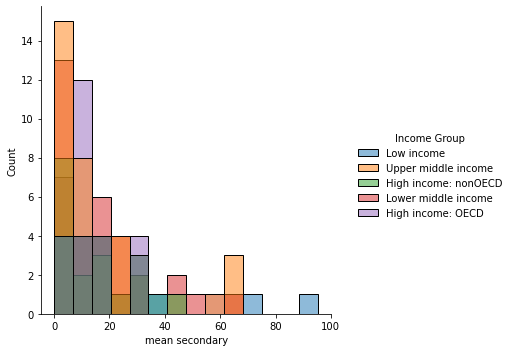

In [843]:
plt.figure(figsize = (10,6) )
sns.displot(df_secondary, x="mean secondary", hue="Income Group")

## check evolution for secondary indicator for 5 first coutries over years

In [844]:
x = df_secondary.sort_values(['2000','2001','2002',
       '2003', '2004','2005','2006','2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014','2015'],ascending= False).columns[4:20]


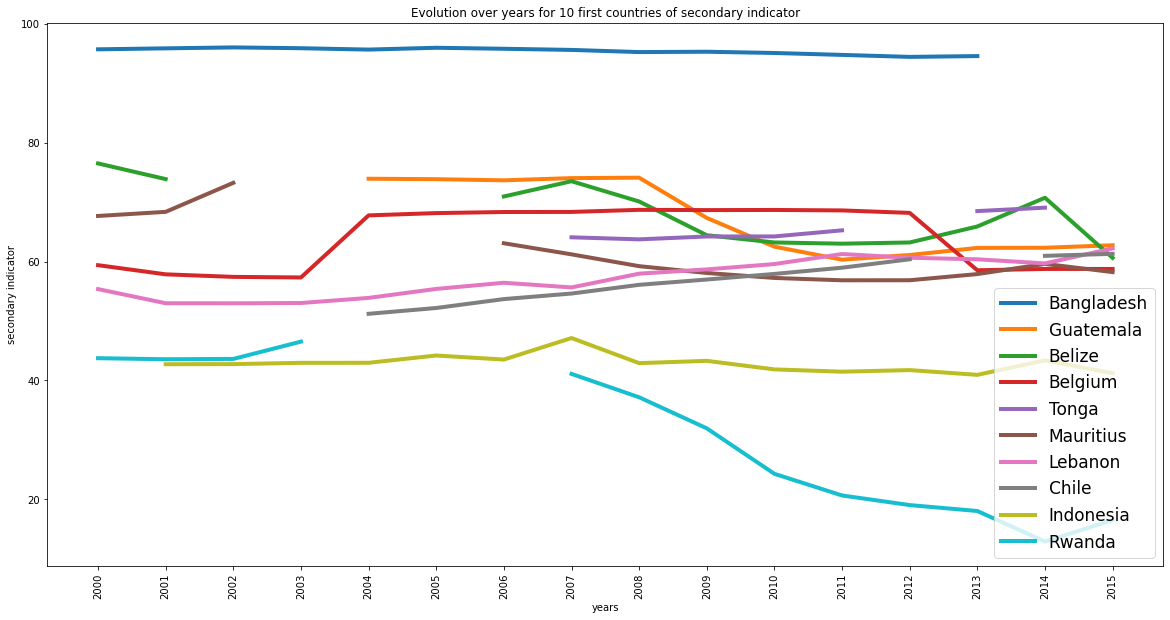

In [845]:
plt.figure(figsize=(20,10))
for index in range(10):
    y = df_secondary.sort_values([ '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014','2015'],ascending=False).iloc[index][4:20]
    plt.plot(x, 
             y, 
             label = df_secondary.sort_values(['2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014','2015'],ascending=False).iloc[index][0],
             linewidth = 4)
    plt.title("Evolution over years for 10 first countries of secondary indicator")
    plt.xlabel('years')
    plt.xticks(rotation = '90')
    plt.ylabel('secondary indicator')
    plt.legend(prop = {'size': 17})

## check the ten first and ten last countries

In [846]:
top_ten_secondary= df_secondary.sort_values("mean secondary", ascending= False).head(10)
# sort values and check the ten firt and ten last countries

<BarContainer object of 10 artists>

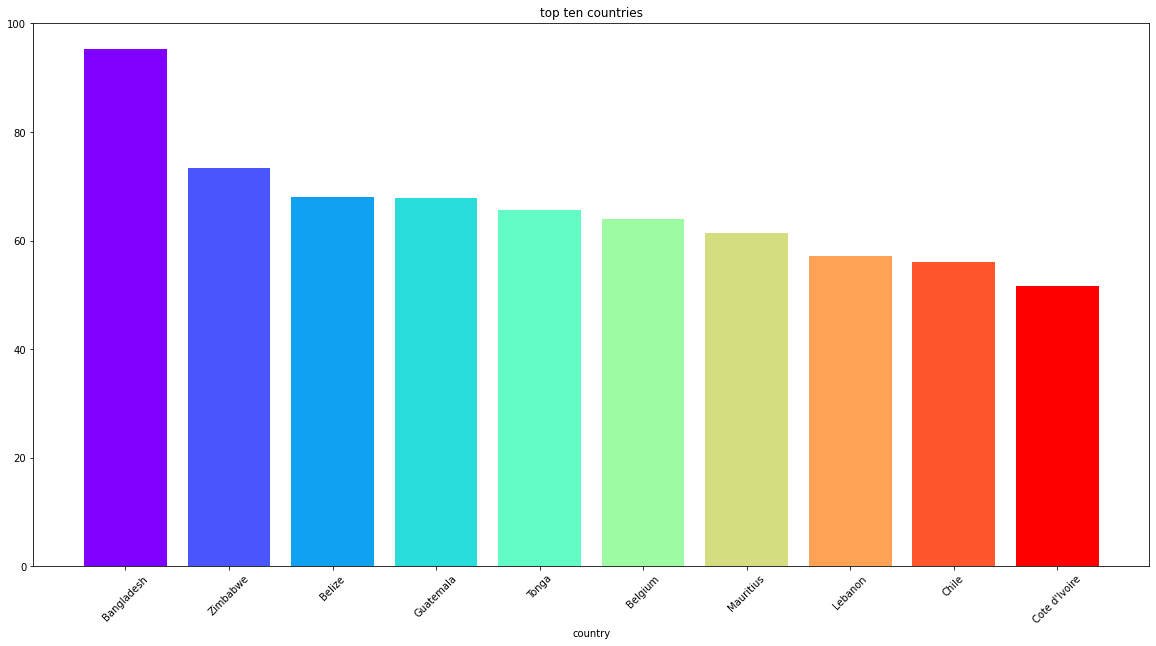

In [847]:
plt.figure(figsize=(20,10))
plt.xticks(rotation = '45')
plt.title("top ten countries")
plt.xlabel('country')
#plt.ylabel('mean internet')
plt.bar(top_ten_secondary['Country Name'],
        top_ten_secondary['mean secondary'],
        color = cm.rainbow(np.linspace(0, 1, len(top_ten_secondary))))

In [848]:
last_secondary= df_secondary.sort_values("mean secondary", ascending= False).tail(23)

<BarContainer object of 23 artists>

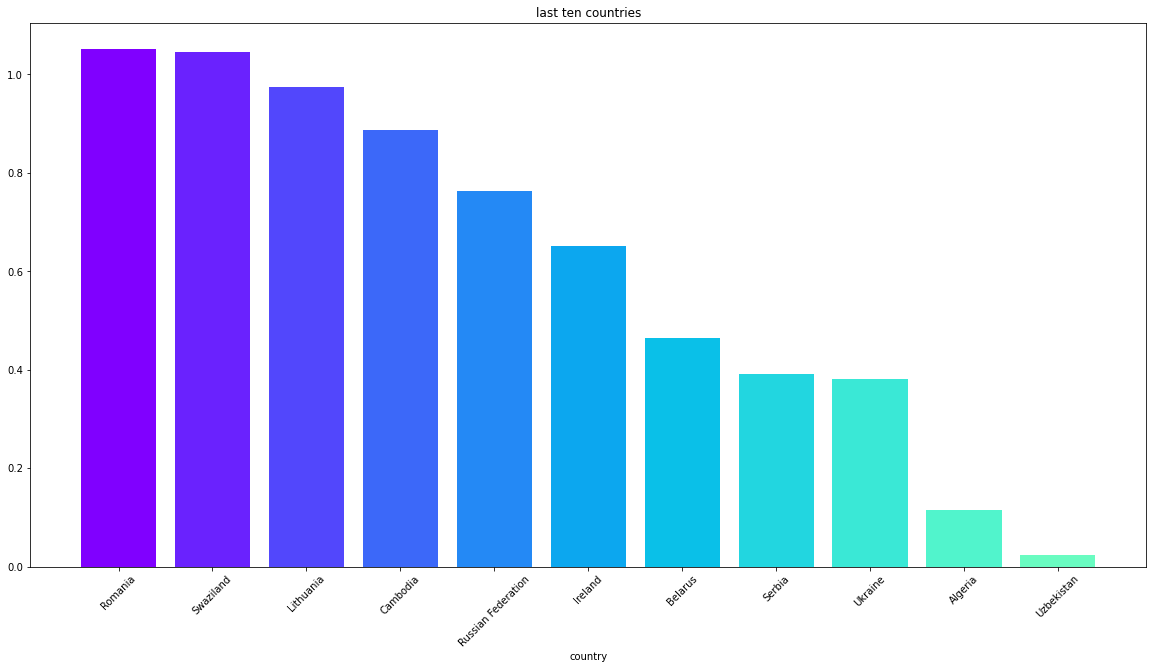

In [849]:
plt.figure(figsize=(20,10))
plt.xticks(rotation = '45')
plt.title("last ten countries")
plt.xlabel('country')
#plt.ylabel('mean internet')
plt.bar(last_secondary['Country Name'],
        last_secondary['mean secondary'],
        color = cm.rainbow(np.linspace(0, 1, len(last_secondary))))

In [850]:
df_secondary = df_secondary.drop(['Country Code', 'Indicator Name', 'Indicator Code',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', 'Region',
       'Income Group', 'Latest population census'],axis = 1 )

## 6)GDP per capita

In [851]:
df_indicator["Indicator Name"].value_counts()

Barro-Lee: Percentage of population age 15+ with secondary schooling. Completed Secondary    149
GDP per capita (current US$)                                                                 149
Internet users (per 100 people)                                                              149
Percentage of enrolment in secondary education in private institutions (%)                   149
Percentage of enrolment in tertiary education in private institutions (%)                    149
Percentage of enrolment in upper secondary education in private institutions (%)             149
Personal computers (per 100 people)                                                          149
Name: Indicator Name, dtype: int64

In [852]:
df_gdp = df_indicator.loc[df_indicator["Indicator Name"] =="GDP per capita (current US$)"]

In [853]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 1245 to 543665
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Name              149 non-null    object 
 1   Country Code              149 non-null    object 
 2   Indicator Name            149 non-null    object 
 3   Indicator Code            149 non-null    object 
 4   2000                      146 non-null    float64
 5   2001                      147 non-null    float64
 6   2002                      147 non-null    float64
 7   2003                      147 non-null    float64
 8   2004                      148 non-null    float64
 9   2005                      148 non-null    float64
 10  2006                      148 non-null    float64
 11  2007                      148 non-null    float64
 12  2008                      147 non-null    float64
 13  2009                      147 non-null    float64
 14  2010

In [854]:
df_gdp.isnull().sum()/df_gdp.shape[0]*100  # percentage of null in every column

Country Name                0.000000
Country Code                0.000000
Indicator Name              0.000000
Indicator Code              0.000000
2000                        2.013423
2001                        1.342282
2002                        1.342282
2003                        1.342282
2004                        0.671141
2005                        0.671141
2006                        0.671141
2007                        0.671141
2008                        1.342282
2009                        1.342282
2010                        1.342282
2011                        1.342282
2012                        3.355705
2013                        2.684564
2014                        3.355705
2015                        4.026846
Region                      0.000000
Income Group                0.000000
Latest population census    0.000000
dtype: float64

<AxesSubplot:>

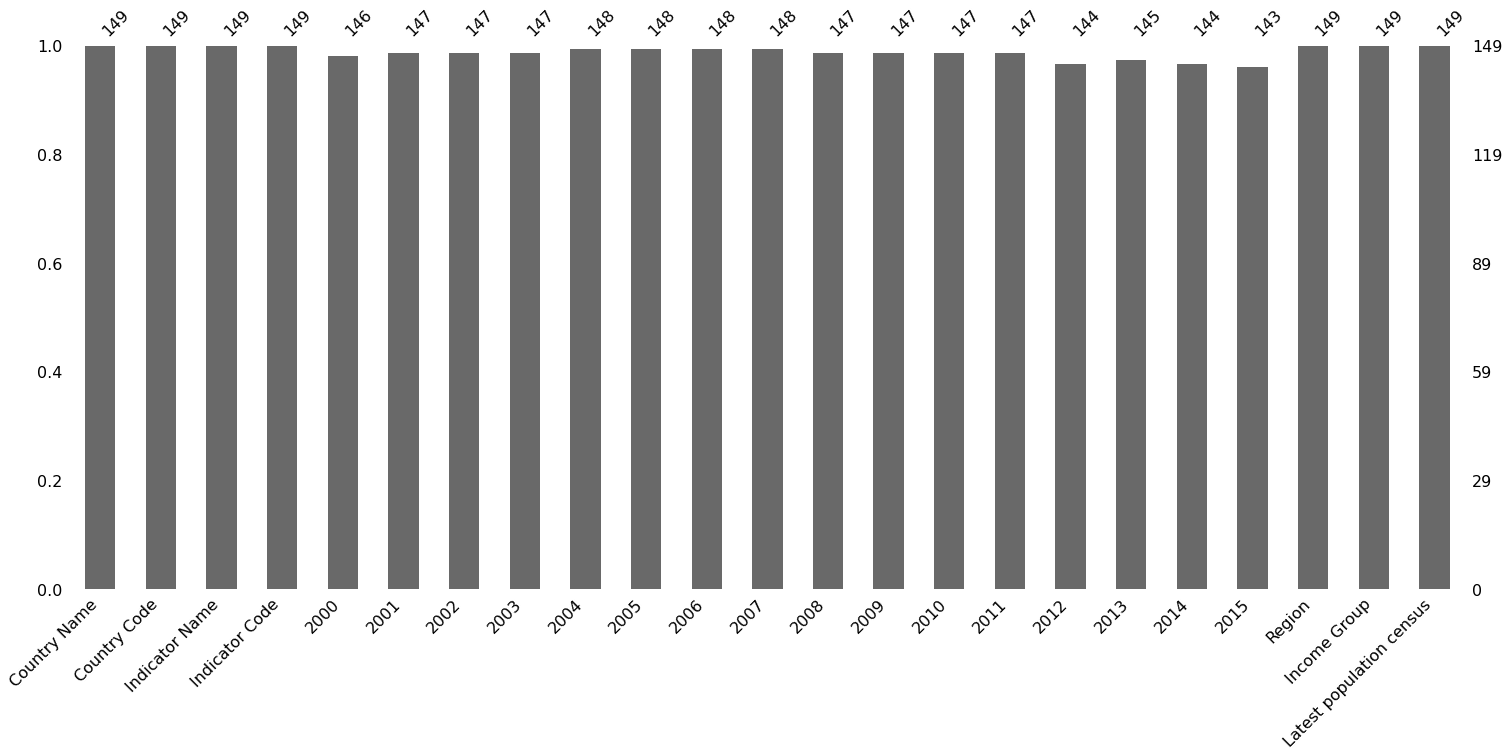

In [855]:
msno.bar(df_gdp)

In [856]:
df_gdp.describe()## check the mean of all the years

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,146.000000,147.000000,147.000000,147.000000,148.000000,148.000000,148.000000,148.000000,147.000000,147.000000,147.000000,147.000000,144.000000,145.000000,144.000000,143.000000
mean,8320.382436,8172.537538,8639.511907,10094.139028,11485.322017,12511.931695,13625.921642,15642.387625,17326.463961,15131.696141,15922.524026,17661.062433,16651.372128,16994.206449,16666.650733,14756.305056
std,12934.661671,12781.469207,13702.684833,16159.531118,18275.068298,19439.487370,20917.871875,24295.100268,26553.379951,22483.598259,22746.596924,25337.155531,21957.246028,22415.878087,21826.304734,19110.193484
min,135.998445,117.409691,122.433589,112.849370,127.429665,150.507043,165.879418,170.799900,196.247263,204.944650,231.194326,260.479907,265.285605,282.755525,312.748979,300.676557
25%,637.345401,659.306003,715.535687,842.881883,963.702687,1022.234311,1195.538284,1349.834837,1716.453931,1621.712440,1957.009497,2236.553812,2361.100358,2243.979662,2244.249687,2148.505294
50%,2123.102124,2100.362386,2346.059370,2710.468024,3200.546201,3609.635047,4158.568385,4796.426599,5574.603802,5185.729845,6029.396800,6519.230195,6843.004424,6933.415429,7122.947740,6044.525655
75%,10836.226573,10750.541348,11744.723742,12859.235163,13428.854238,14626.278248,15747.885910,18624.129149,22001.868015,18824.295977,20265.087490,22114.808772,20918.580664,21268.756374,20076.799100,17518.702234
max,82534.873767,82552.567453,89061.050666,108978.489682,123382.014903,126655.598082,135535.002415,170156.694368,192989.189527,152111.598027,144246.368775,162009.877819,106749.013623,113625.132900,119225.380023,101446.786303


In [857]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 1245 to 543665
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Name              149 non-null    object 
 1   Country Code              149 non-null    object 
 2   Indicator Name            149 non-null    object 
 3   Indicator Code            149 non-null    object 
 4   2000                      146 non-null    float64
 5   2001                      147 non-null    float64
 6   2002                      147 non-null    float64
 7   2003                      147 non-null    float64
 8   2004                      148 non-null    float64
 9   2005                      148 non-null    float64
 10  2006                      148 non-null    float64
 11  2007                      148 non-null    float64
 12  2008                      147 non-null    float64
 13  2009                      147 non-null    float64
 14  2010

In [858]:
df_gdp["mean gdp"] = df_gdp.iloc[:,4:20].mean(axis = 1)

C:\Users\naoue\AppData\Local\Temp\ipykernel_23132\2027574775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gdp["mean gdp"] = df_gdp.iloc[:,4:20].mean(axis = 1)


In [859]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 1245 to 543665
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Name              149 non-null    object 
 1   Country Code              149 non-null    object 
 2   Indicator Name            149 non-null    object 
 3   Indicator Code            149 non-null    object 
 4   2000                      146 non-null    float64
 5   2001                      147 non-null    float64
 6   2002                      147 non-null    float64
 7   2003                      147 non-null    float64
 8   2004                      148 non-null    float64
 9   2005                      148 non-null    float64
 10  2006                      148 non-null    float64
 11  2007                      148 non-null    float64
 12  2008                      147 non-null    float64
 13  2009                      147 non-null    float64
 14  2010

In [860]:
## check mean with income group

<Figure size 1440x720 with 0 Axes>

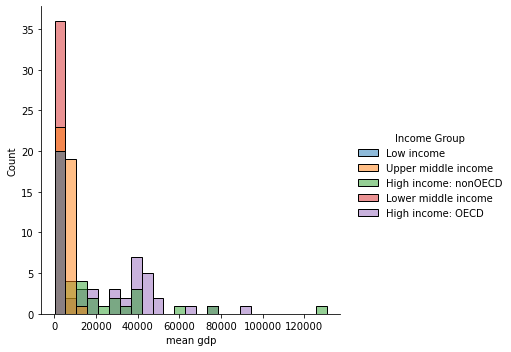

In [861]:
plt.figure(figsize = (20,10) )
sns.displot(df_gdp, x="mean gdp", hue="Income Group")



## check evolution for secondary indicator for 5 first coutries over years

In [862]:
x = df_gdp.sort_values(['2000','2001','2002',
       '2003', '2004','2005','2006','2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014','2015'],ascending= False).columns[4:20]


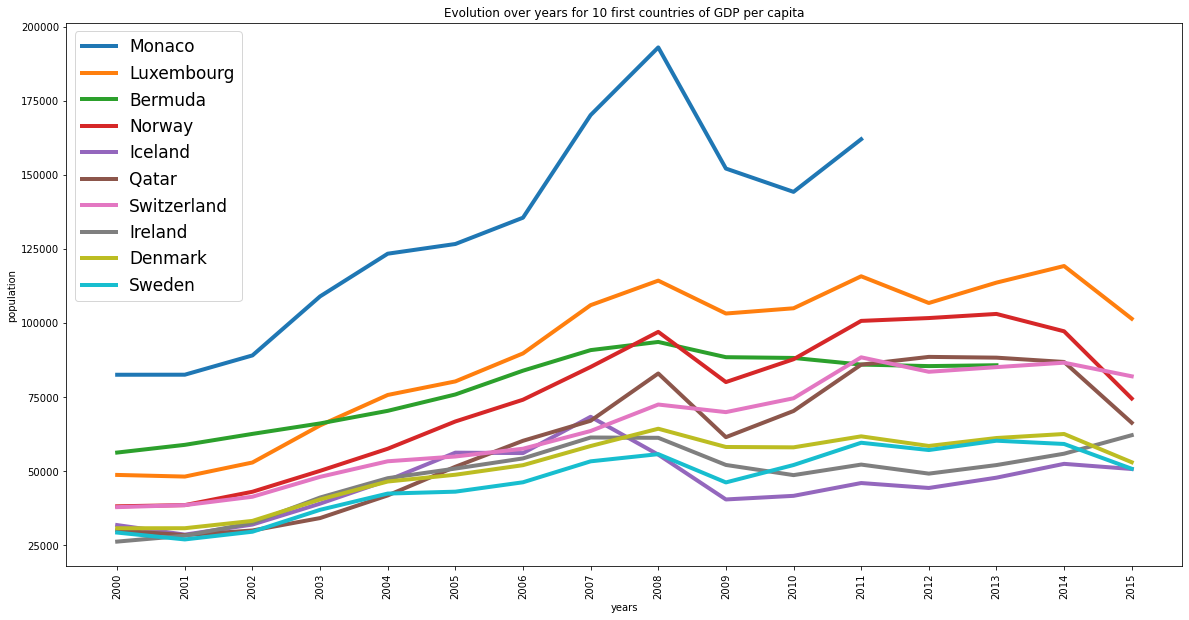

In [863]:
plt.figure(figsize=(20,10))
for index in range(10):
    y = df_gdp.sort_values([ '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014','2015'],ascending=False).iloc[index][4:20]
    plt.plot(x, 
             y, 
             label = df_gdp.sort_values(['2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014','2015'],ascending=False).iloc[index][0],
             linewidth = 4)
    plt.title("Evolution over years for 10 first countries of GDP per capita")
    plt.xlabel('years')
    plt.xticks(rotation = '90')
    plt.ylabel('population')
    plt.legend(prop = {'size': 17})

## check the ten first and ten last countries

In [864]:
top_ten_gdp= df_gdp.sort_values("mean gdp", ascending= False).head(10)
# sort values and check the ten firt and ten last countries

<BarContainer object of 10 artists>

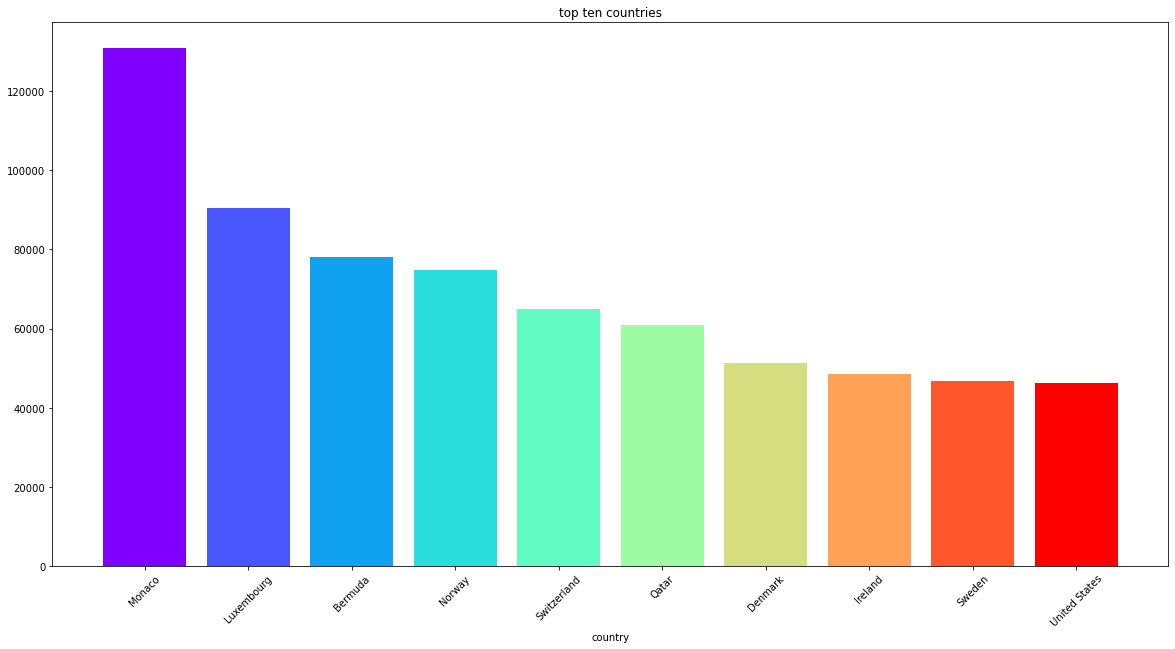

In [865]:
plt.figure(figsize=(20,10))
plt.xticks(rotation = '45')
plt.title("top ten countries")
plt.xlabel('country')
#plt.ylabel('mean internet')
plt.bar(top_ten_gdp['Country Name'],
       top_ten_gdp['mean gdp'],
        color = cm.rainbow(np.linspace(0, 1, len(top_ten_gdp))))

In [139]:
last_gdp= df_gdp.sort_values("mean gdp", ascending= False).tail(10)

<BarContainer object of 10 artists>

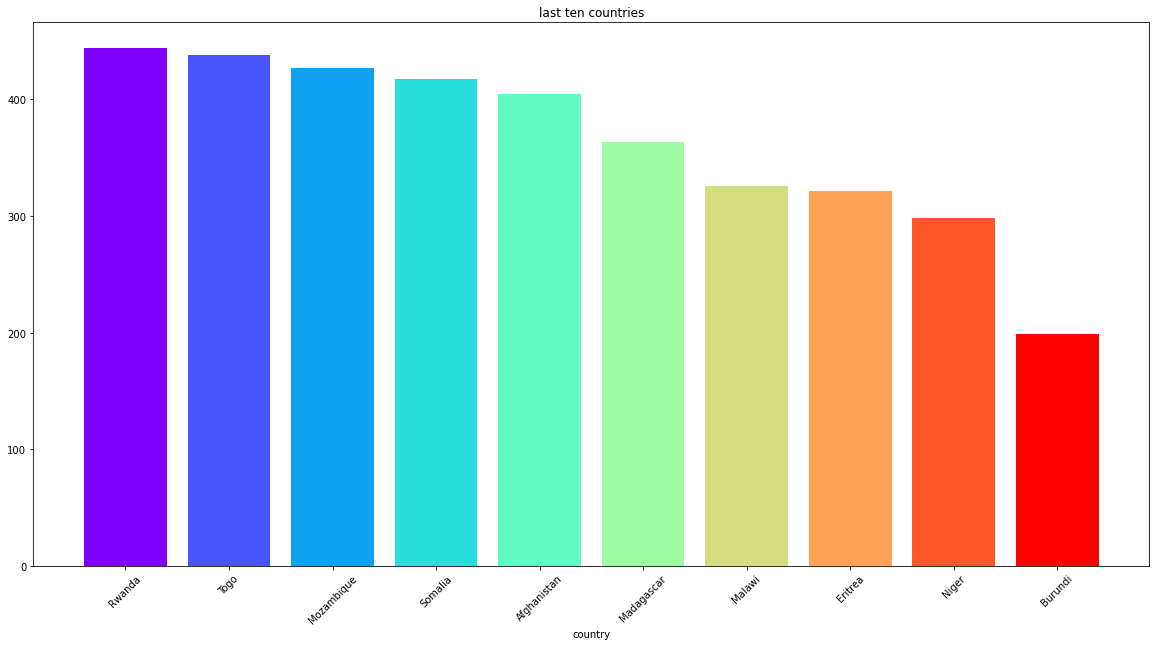

In [140]:
plt.figure(figsize=(20,10))
plt.xticks(rotation = '45')
plt.title("last ten countries")
plt.xlabel('country')
#plt.ylabel('mean internet')
plt.bar(last_gdp['Country Name'],
        last_gdp['mean gdp'],
        color = cm.rainbow(np.linspace(0, 1, len(last_gdp))))

In [866]:
df_gdp.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', 'Region',
       'Income Group', 'Latest population census', 'mean gdp'],
      dtype='object')

In [867]:
df_gdp =df_gdp.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', 'Region',
       'Income Group', 'Latest population census'], axis = 0)

# merge dataframes with country and mean for all years

In [868]:
frames =[df_internet,df_computer, df_secondary, df_upper_private, df_tertiary, df_gdp]

In [869]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,on='Country Name'),frames)

In [870]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 148
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    149 non-null    object 
 1   mean internet   148 non-null    float64
 2   mean computer   145 non-null    float64
 3   mean secondary  137 non-null    float64
 4   mean upper      138 non-null    float64
 5   mean tertiary   126 non-null    float64
 6   mean gdp        149 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.3+ KB


In [871]:
df_merged.describe()

,mean internet,mean computer,mean secondary,mean upper,mean tertiary,mean gdp
count,148.000000,145.000000,137.000000,138.000000,126.000000,149.000000
mean,29.840013,14.087483,16.978911,18.882321,31.667755,13796.535416
std,24.124439,18.948439,17.646045,18.130553,25.217617,20329.274117
min,0.585446,0.061555,0.022760,0.228004,0.000000,198.373313
25%,8.202368,1.513841,4.745104,4.583221,13.065851,1469.880914
50%,24.042195,4.541062,12.264136,13.041127,23.309244,4496.266696
75%,47.176721,17.713206,22.740979,28.121372,47.784938,15630.514345
max,85.527488,76.924256,95.380682,92.122134,100.000000,130851.110457


In [872]:
df_merged.head(20)

,Country Name,mean internet,mean computer,mean secondary,mean upper,mean tertiary,mean gdp
0,Afghanistan,3.095920,0.366026,1.968095,1.523700,21.557184,404.954067
1,Albania,26.823822,1.575012,6.646133,7.113699,17.253806,3235.707039
2,Algeria,11.840026,0.792996,0.115621,0.228004,0.000000,3736.866664
3,Andorra,60.227381,NaN,3.127129,4.331999,7.469133,37694.037953
4,Angola,3.361894,0.323561,10.680165,10.490850,52.348723,2678.181845
5,Argentina,32.925131,8.043982,25.692053,30.335242,26.421679,8432.935816
6,Armenia,18.931713,3.963237,2.115173,2.969830,12.262925,2503.337284
7,Australia,71.562854,53.622604,31.230062,28.295028,7.582670,42945.048656
8,Austria,63.952521,50.036888,9.487233,10.486606,16.382185,41476.463740
9,Azerbaijan,32.835400,1.712802,NaN,34.229833,12.098818,4017.159029


## check correlations between indicator

In [873]:
df_merged.corr()
# check the correlations between indicator

,mean internet,mean computer,mean secondary,mean upper,mean tertiary,mean gdp
mean internet,1.000000,0.899477,-0.090129,-0.135379,0.082469,0.799250
mean computer,0.899477,1.000000,-0.057289,-0.093876,0.101659,0.873234
mean secondary,-0.090129,-0.057289,1.000000,0.944399,0.333480,0.007634
mean upper,-0.135379,-0.093876,0.944399,1.000000,0.349418,-0.051333
mean tertiary,0.082469,0.101659,0.333480,0.349418,1.000000,0.113790
mean gdp,0.799250,0.873234,0.007634,-0.051333,0.113790,1.000000


<AxesSubplot:>

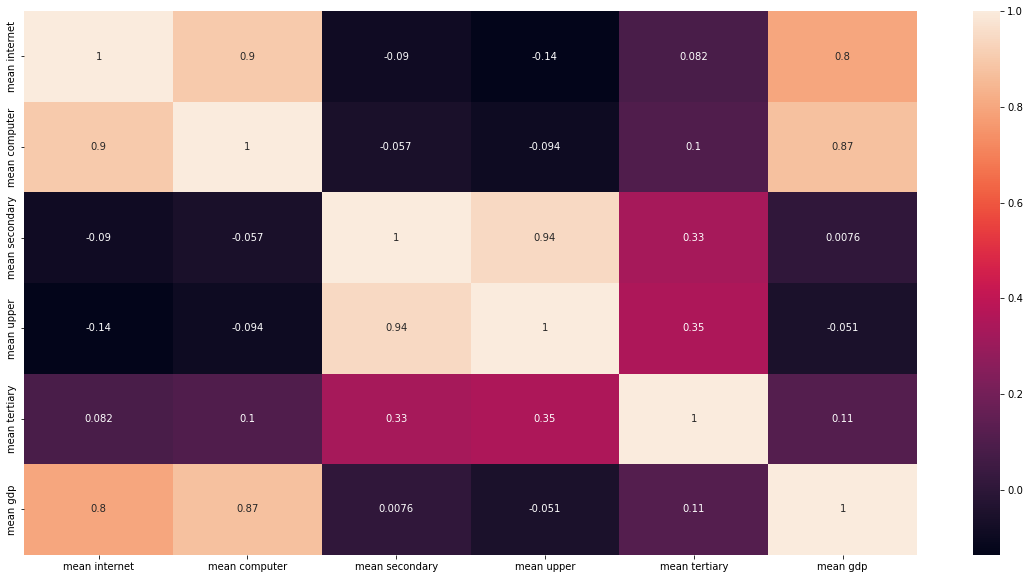

In [874]:
plt.figure(figsize=(20,10))
sns.heatmap(df_merged.corr(), annot=True)
# visualize corralation with heatmap

In [875]:
df_merged.isnull().sum()

Country Name       0
mean internet      1
mean computer      4
mean secondary    12
mean upper        11
mean tertiary     23
mean gdp           0
dtype: int64

In [194]:

#data_merged = df_merged.fillna(df_merged.mode().iloc[0])#, inplace=True)

### scale gdp indicator

In [876]:
data_merged['mean gdp'].value_counts()

0.158114     1
1.670375     1
2.881524     1
0.201669     1
33.547030    1
            ..
5.531030     1
28.841382    1
0.593986     1
1.818242     1
0.342655     1
Name: mean gdp, Length: 148, dtype: int64

In [877]:
scaler = MinMaxScaler()

In [878]:
scaler.fit(data_merged[['mean gdp']])

MinMaxScaler()

In [879]:
data_merged[['mean gdp']] = scaler.transform(data_merged[['mean gdp']])

In [880]:
data_merged.head()

,Country Name,mean internet,mean computer,mean secondary,mean upper,mean tertiary,mean gdp
0,Afghanistan,3.095920,0.366026,1.968095,1.523700,21.557184,0.001581
1,Albania,26.823822,1.575012,6.646133,7.113699,16.073637,0.023247
2,Algeria,11.840026,0.792996,0.115621,0.228004,0.000000,0.027083
3,Andorra,60.227381,0.061555,3.127129,4.331999,7.469133,0.286987
4,Angola,3.361894,0.323561,10.680165,10.490850,52.348723,0.018980


In [881]:
data_merged['mean gdp'] = data_merged.apply(lambda row: row['mean gdp'] * 100, axis=1)
# multiply per 100 to transgor the gdp to percentage

In [882]:
data_merged.head()

,Country Name,mean internet,mean computer,mean secondary,mean upper,mean tertiary,mean gdp
0,Afghanistan,3.095920,0.366026,1.968095,1.523700,21.557184,0.158114
1,Albania,26.823822,1.575012,6.646133,7.113699,16.073637,2.324738
2,Algeria,11.840026,0.792996,0.115621,0.228004,0.000000,2.708319
3,Andorra,60.227381,0.061555,3.127129,4.331999,7.469133,28.698721
4,Angola,3.361894,0.323561,10.680165,10.490850,52.348723,1.898015


## calculate score 

In [883]:
def apply_multiple_formulas(dataframe): # function to calculate a score for each indicator
    new_dataframe = dataframe.copy()
    new_dataframe['mean internet'] = dataframe.apply(lambda row: row['mean internet']* 0.6, axis=1)
    #new_dataframe['mean computer'] = dataframe.apply(lambda row: row['mean computer']* 0.2, axis=1)
    new_dataframe['mean secondary'] = dataframe.apply(lambda row: row['mean secondary']* 0.08, axis=1)
    new_dataframe['mean upper'] = dataframe.apply(lambda row: row['mean upper']* 0.06, axis=1)
    new_dataframe['mean tertiary'] = dataframe.apply(lambda row: row['mean tertiary']* 0.06, axis=1)
    new_dataframe['mean gdp'] = dataframe.apply(lambda row: row['mean gdp']* 0.2, axis=1)
    return new_dataframe

In [884]:
data_less_computer = data_merged.drop(['mean computer'], axis = 1)

In [885]:
data_less_computer

,Country Name,mean internet,mean secondary,mean upper,mean tertiary,mean gdp
0,Afghanistan,3.095920,1.968095,1.523700,21.557184,0.158114
1,Albania,26.823822,6.646133,7.113699,16.073637,2.324738
2,Algeria,11.840026,0.115621,0.228004,0.000000,2.708319
3,Andorra,60.227381,3.127129,4.331999,7.469133,28.698721
4,Angola,3.361894,10.680165,10.490850,52.348723,1.898015
...,...,...,...,...,...,...
143,"Venezuela, RB",27.275470,27.692536,30.417433,28.420361,6.435186
144,Vietnam,21.346095,0.022760,0.228004,13.270096,0.700501
145,"Yemen, Rep.",8.604462,2.688349,2.452813,21.590110,0.644931
146,Zambia,7.375366,0.022760,0.228004,0.000000,0.667923


In [886]:
data_less_computer = apply_multiple_formulas(data_less_compu)

In [887]:
data_less_computer.head()

,Country Name,mean internet,mean secondary,mean upper,mean tertiary,mean gdp
0,Afghanistan,1.114531,0.012596,0.005485,0.077606,0.006325
1,Albania,9.656576,0.042535,0.025609,0.057865,0.092990
2,Algeria,4.262409,0.000740,0.000821,0.000000,0.108333
3,Andorra,21.681857,0.020014,0.015595,0.026889,1.147949
4,Angola,1.210282,0.068353,0.037767,0.188455,0.075921


In [888]:
#Create a function to sum each row in a dataset
def sum_each_row(dataframe): 
    new_dataframe = dataframe.copy()
    new_dataframe['score'] = dataframe.sum(axis=1)
    return new_dataframe 

In [889]:
data_score  = sum_each_row(data_less_computer.iloc[:,1:])

In [890]:
data_score['Country Name'] = data_less_computer['Country Name']

In [891]:
data_score.head()

,mean internet,mean secondary,mean upper,mean tertiary,mean gdp,score,Country Name
0,1.114531,0.012596,0.005485,0.077606,0.006325,1.216543,Afghanistan
1,9.656576,0.042535,0.025609,0.057865,0.092990,9.875575,Albania
2,4.262409,0.000740,0.000821,0.000000,0.108333,4.372303,Algeria
3,21.681857,0.020014,0.015595,0.026889,1.147949,22.892304,Andorra
4,1.210282,0.068353,0.037767,0.188455,0.075921,1.580778,Angola


In [892]:
data_score = data_score.drop(['mean internet','mean secondary','mean upper','mean tertiary','mean gdp'], axis = 1)

In [893]:
data_score.head()

,score,Country Name
0,1.216543,Afghanistan
1,9.875575,Albania
2,4.372303,Algeria
3,22.892304,Andorra
4,1.580778,Angola


## show ten first countries ordered by score 

In [894]:
top_ten_score= data_score.sort_values("score", ascending= False).head(10)
# sort values and check the ten firt and ten last countries

<BarContainer object of 10 artists>

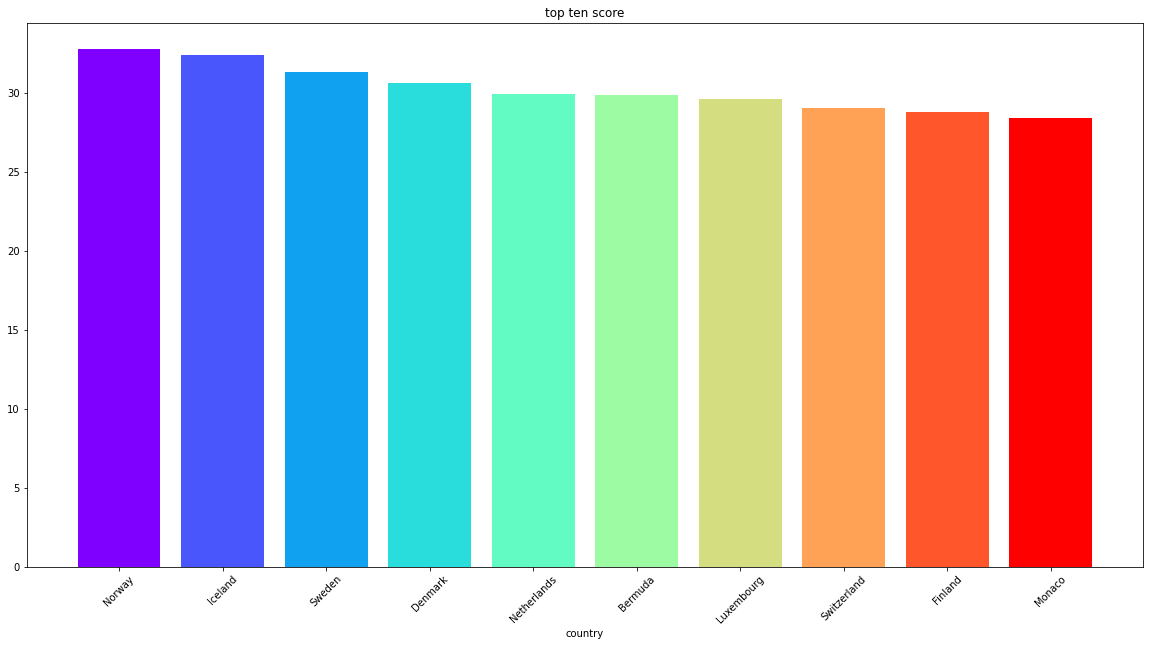

In [895]:
plt.figure(figsize=(20,10))
plt.xticks(rotation = '45')
plt.title("top ten score")
plt.xlabel('country')
#plt.ylabel('mean internet')
plt.bar(top_ten_score['Country Name'],
       top_ten_score['score']
        ,color = cm.rainbow(np.linspace(0, 1, len(top_ten_score))))

In [898]:
top_ten_score

,score,Country Name
101,32.759265,Norway
58,32.360076,Iceland
126,31.301421,Sweden
39,30.626227,Denmark
97,29.948343,Netherlands
17,29.877537,Bermuda
80,29.579002,Luxembourg
127,29.029057,Switzerland
47,28.788045,Finland
91,28.421036,Monaco


In [218]:
last_ten_score= data_score.sort_values("score", ascending= False).tail(10)
# sort values and check the ten firt and ten last countries

<BarContainer object of 10 artists>

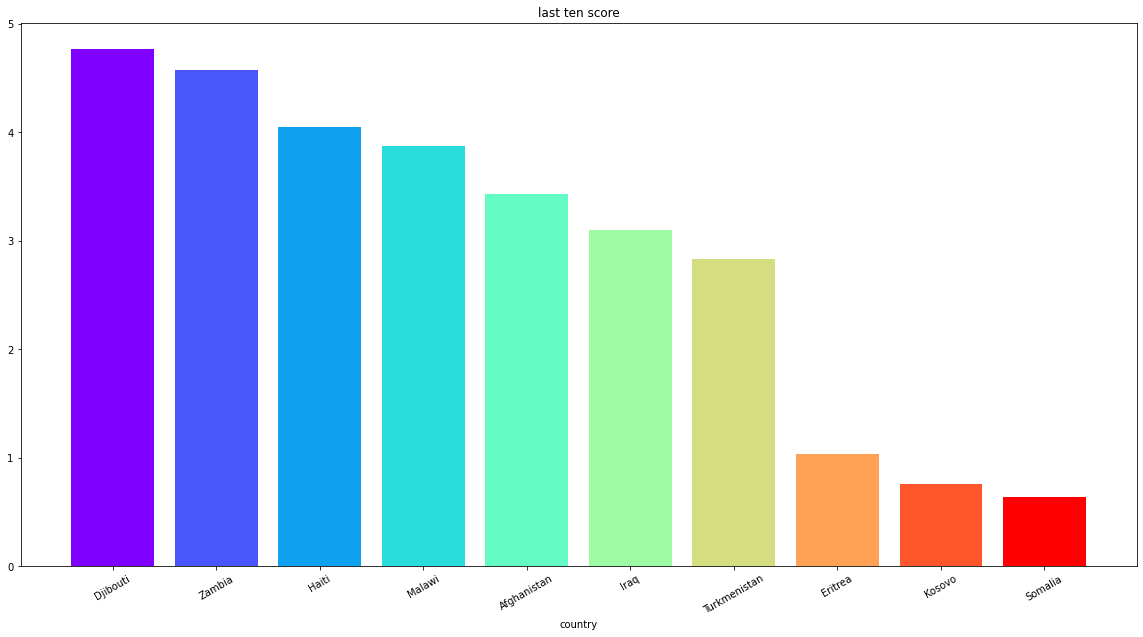

In [899]:
plt.figure(figsize=(20,10))
plt.xticks(rotation = '30')
plt.title("last ten score")
plt.xlabel('country')
#plt.ylabel('mean internet')
plt.bar(last_ten_score['Country Name'],
       last_ten_score['score'],
        color = cm.rainbow(np.linspace(0, 1, len(top_ten_score))))

In [900]:
last_ten_score

,score,Country Name
40,4.771713,Djibouti
146,4.574305,Zambia
54,4.049700,Haiti
82,3.878934,Malawi
0,3.431476,Afghanistan
62,3.102884,Iraq
136,2.834962,Turkmenistan
45,1.038291,Eritrea
71,0.759030,Kosovo
119,0.639554,Somalia


### distribution of score data

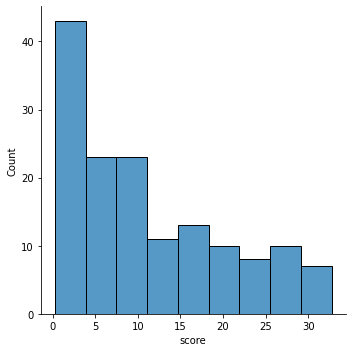

In [901]:
sns.displot(data_score, x = 'score')

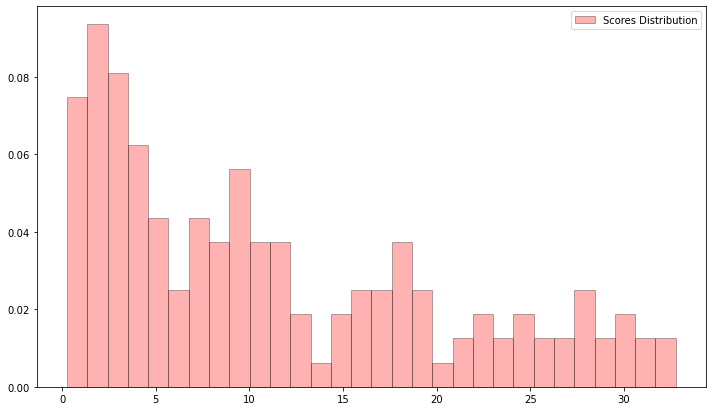

In [902]:
plt.figure(figsize = (12,7))
plt.hist(data_score['score'], edgecolor='black', bins=30, alpha=.3, density=True, color='red'
         , label='Scores Distribution')
plt.legend()
plt.show()

## check the countries with the best score after 2015

### use first dataset

In [903]:
df= pd.read_csv("EdStatsData.csv",sep = ',')
pd.set_option('display.max_columns', None)

In [904]:
df.shape

(886930, 70)

In [905]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

### drop list of non countries I get

In [906]:
list_not_country = ['Arab World',
 'Arab World',
 'Arab World',
'Macao SAR, China',
 'East Asia & Pacific',
 'East Asia & Pacific',
 'East Asia & Pacific',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (excluding high income)',
 'East Asia & Pacific (excluding high income)',
 'Euro area',
 'Euro area',
 'Euro area',
 'Europe & Central Asia',
 'Europe & Central Asia',
 'Europe & Central Asia',
 'Europe & Central Asia (excluding high income)',
 'Europe & Central Asia (excluding high income)',
 'Europe & Central Asia (excluding high income)',
 'European Union',
 'European Union',
 'European Union',
 'Heavily indebted poor countries (HIPC)',
 'Heavily indebted poor countries (HIPC)',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'High income',
 'High income',
 'Latin America & Caribbean',
 'Latin America & Caribbean',
 'Latin America & Caribbean',
 'Latin America & Caribbean (excluding high income)',
 'Latin America & Caribbean (excluding high income)',
 'Latin America & Caribbean (excluding high income)',
 'Least developed countries: UN classification',
 'Least developed countries: UN classification',
 'Least developed countries: UN classification',
 'Low & middle income',
 'Low & middle income',
 'Low & middle income',
 'Low income',
 'Low income',
 'Low income',
 'Lower middle income',
 'Lower middle income',
 'Lower middle income',
 'Middle East & North Africa',
 'Middle East & North Africa',
 'Middle East & North Africa',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (excluding high income)',
 'Middle East & North Africa (excluding high income)',
 'Middle income',
 'Middle income',
 'Middle income',
 'North America',
 'North America',
 'North America',
 'OECD members',
 'OECD members',
 'OECD members',
 'South Asia',
 'South Asia',
 'South Asia',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa',
 'Sub-Saharan Africa (excluding high income)',
 'Sub-Saharan Africa (excluding high income)',
 'Sub-Saharan Africa (excluding high income)',
 'Upper middle income',
 'Upper middle income',
 'Upper middle income',
 'World',
 'World',
 'World',
 'American Samoa',
 'American Samoa',
 'American Samoa',
 'American Samoa',
 'American Samoa',
 'American Samoa',
 'Antigua and Barbuda',
 'Aruba',
 'Aruba',
 'Bahamas, The',
 'Bahamas, The',
 'Bosnia and Herzegovina',
 'British Virgin Islands',
 'British Virgin Islands',
 'British Virgin Islands',
 'British Virgin Islands',
 'British Virgin Islands',
 'British Virgin Islands',
 'Burkina Faso',
 'Cabo Verde',
 'Cayman Islands',
 'Cayman Islands',
 'Cayman Islands',
 'Cayman Islands',
 'Central African Republic',
 'Central African Republic',
 'Channel Islands',
 'Channel Islands',
 'Channel Islands',
 'Channel Islands',
 'Channel Islands',
 'Channel Islands',
 'Comoros',
 'Comoros',
 'Congo, Dem. Rep.',
 'Curacao',
 'Curacao',
 'Curacao',
 'Curacao',
 'Curacao',
 'Curacao',
 'Curacao',
 'Egypt, Arab Rep.',
 'Egypt, Arab Rep.',
 'Equatorial Guinea',
 'Equatorial Guinea',
 'Equatorial Guinea',
 'Equatorial Guinea',
 'Ethiopia',
 'Faroe Islands',
 'Faroe Islands',
 'Faroe Islands',
 'Faroe Islands',
 'Faroe Islands',
 'Fiji',
 'Fiji',
 'Fiji',
 'French Polynesia',
 'French Polynesia',
 'French Polynesia',
 'French Polynesia',
 'French Polynesia',
 'Gambia, The',
 'Gambia, The',
 'Gambia, The',
 'Georgia',
 'Gibraltar',
 'Gibraltar',
 'Gibraltar',
 'Gibraltar',
 'Gibraltar',
 'Greece',
 'Greenland',
 'Greenland',
 'Greenland',
 'Greenland',
 'Greenland',
 'Grenada',
 'Grenada',
 'Guam',
 'Guam',
 'Guam',
 'Guam',
 'Guam',
 'Guinea',
 'Guinea-Bissau',
 'Guinea-Bissau',
 'Guinea-Bissau',
 'Guinea-Bissau',
 'Isle of Man',
 'Isle of Man',
 'Isle of Man',
 'Isle of Man',
 'Isle of Man',
 'Isle of Man',
 'Kiribati',
 'Kiribati',
 'Kiribati',
 'Kiribati',
 'Korea, Dem. People’s Rep.',
 'Korea, Dem. People’s Rep.',
 'Korea, Dem. People’s Rep.',
 'Korea, Dem. People’s Rep.',
 'Korea, Dem. People’s Rep.',
 'Korea, Dem. People’s Rep.',
 'Liberia',
 'Liberia',
 'Liberia',
 'Liberia',
 'Liechtenstein',
 'Liechtenstein',
 'Macedonia, FYR',
 'Marshall Islands',
 'Marshall Islands',
 'Marshall Islands',
 'Marshall Islands',
 'Micronesia, Fed. Sts.',
 'Micronesia, Fed. Sts.',
 'Micronesia, Fed. Sts.',
 'Micronesia, Fed. Sts.',
 'Montenegro',
 'Montenegro',
 'Montenegro',
 'Myanmar',
 'Myanmar',
 'Myanmar',
 'Nauru',
 'Nauru',
 'Nauru',
 'Nauru',
 'Nauru',
 'Nauru',
 'Nauru',
 'New Caledonia',
 'New Caledonia',
 'New Caledonia',
 'New Caledonia',
 'New Caledonia',
 'Nicaragua',
 'Northern Mariana Islands',
 'Northern Mariana Islands',
 'Northern Mariana Islands',
 'Northern Mariana Islands',
 'Northern Mariana Islands',
 'Northern Mariana Islands',
 'Palau',
 'Palau',
 'Palau',
 'Palau',
 'Palau',
 'Palau',
 'Papua New Guinea',
 'Papua New Guinea',
 'Papua New Guinea',
 'Puerto Rico',
 'Samoa',
 'Samoa',
 'San Marino',
 'San Marino',
 'San Marino',
 'San Marino',
 'Sao Tome and Principe',
 'Saudi Arabia',
 'Seychelles',
 'Seychelles',
 'Sierra Leone',
 'Sierra Leone',
 'Sint Maarten (Dutch part)',
 'Sint Maarten (Dutch part)',
 'Sint Maarten (Dutch part)',
 'Sint Maarten (Dutch part)',
 'Sint Maarten (Dutch part)',
 'Sint Maarten (Dutch part)',
 'Solomon Islands',
 'Solomon Islands',
 'South Sudan',
 'South Sudan',
 'South Sudan',
 'South Sudan',
 'South Sudan',
 'South Sudan',
 'St. Kitts and Nevis',
 'St. Kitts and Nevis',
 'St. Lucia',
 'St. Martin (French part)',
 'St. Martin (French part)',
 'St. Martin (French part)',
 'St. Martin (French part)',
 'St. Martin (French part)',
 'St. Martin (French part)',
 'St. Martin (French part)',
 'St. Vincent and the Grenadines',
 'St. Vincent and the Grenadines',
 'Tanzania',
 'Tanzania',
 'Timor-Leste',
 'Timor-Leste',
 'Timor-Leste',

 'Turks and Caicos Islands',
 'Turks and Caicos Islands',
 'Turks and Caicos Islands',
 'Turks and Caicos Islands',
 'Turks and Caicos Islands',
 'Tuvalu',
 'Tuvalu',
 'Tuvalu',
 'Tuvalu',
 'Uganda',
 'Uganda',
 'Vanuatu',
 'Vanuatu',
 'Vanuatu',
 'Vanuatu',
 'Virgin Islands (U.S.)',
 'Virgin Islands (U.S.)',
 'Virgin Islands (U.S.)',
 'Virgin Islands (U.S.)',
 'West Bank and Gaza',
]


In [907]:
df = df[df["Country Name"].isin(list_not_country) == False]

## merge with EdStats Country to get other informations

In [908]:

df_edstats_country = pd.read_csv("EdStatsCountry.csv", sep = ',')
pd.set_option('display.max_columns', None)


In [909]:
data = pd.merge(df,df_edstats_country[["Country Code","Region","Income Group","Latest population census"]])

In [910]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546085 entries, 0 to 546084
Data columns (total 73 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Country Name              546085 non-null  object 
 1   Country Code              546085 non-null  object 
 2   Indicator Name            546085 non-null  object 
 3   Indicator Code            546085 non-null  object 
 4   1970                      59334 non-null   float64
 5   1971                      25040 non-null   float64
 6   1972                      25020 non-null   float64
 7   1973                      25333 non-null   float64
 8   1974                      25463 non-null   float64
 9   1975                      71679 non-null   float64
 10  1976                      26915 non-null   float64
 11  1977                      26980 non-null   float64
 12  1978                      26629 non-null   float64
 13  1979                      25947 non-null   f

In [911]:
indicator_list = [
                "Enrolment in secondary education","Enrolment in tertiary education",
                  "Percentage of enrolment in tertiary education in private institutions (%)",
                 "Percentage of enrolment in secondary education in private institutions (%)",
                  "Percentage of enrolment in upper secondary education in private institutions (%)",
                 "Internet users (per 100 people)","GDP per capita (current US$)",
                  "Personal computers (per 100 people)"]

In [912]:
data_indic = data[data['Indicator Name'].isin(indicator_list)]## select list of indicator

In [913]:
#replace Korea,REP
data_indic['Country Name'] = data_indic['Country Name'].replace('Korea, Rep.','South Korea')

C:\Users\naoue\AppData\Local\Temp\ipykernel_23132\1698537273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_indic['Country Name'] = data_indic['Country Name'].replace('Korea, Rep.','South Korea')


### check evolution of first country 

In [915]:
list_ten_countries = ['Norway','Iceland','Sweden','Denmark', 'Netherland','Bermuda' , 'Luxembourg', 
                      'Switzerland', 'Finland', 'Monaco' ]

In [916]:
data_ten_countries = data_indic[data_indic['Country Name'].isin(list_ten_countries)]## select list of ten best countries 

In [917]:
##locate the first country and the evolution
data_ten_countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 63550 to 471204
Data columns (total 73 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country Name              54 non-null     object 
 1   Country Code              54 non-null     object 
 2   Indicator Name            54 non-null     object 
 3   Indicator Code            54 non-null     object 
 4   1970                      8 non-null      float64
 5   1971                      8 non-null      float64
 6   1972                      8 non-null      float64
 7   1973                      8 non-null      float64
 8   1974                      8 non-null      float64
 9   1975                      8 non-null      float64
 10  1976                      8 non-null      float64
 11  1977                      8 non-null      float64
 12  1978                      8 non-null      float64
 13  1979                      8 non-null      float64
 14  1980

Text(0.5, 1.0, 'top ten countries missing data')

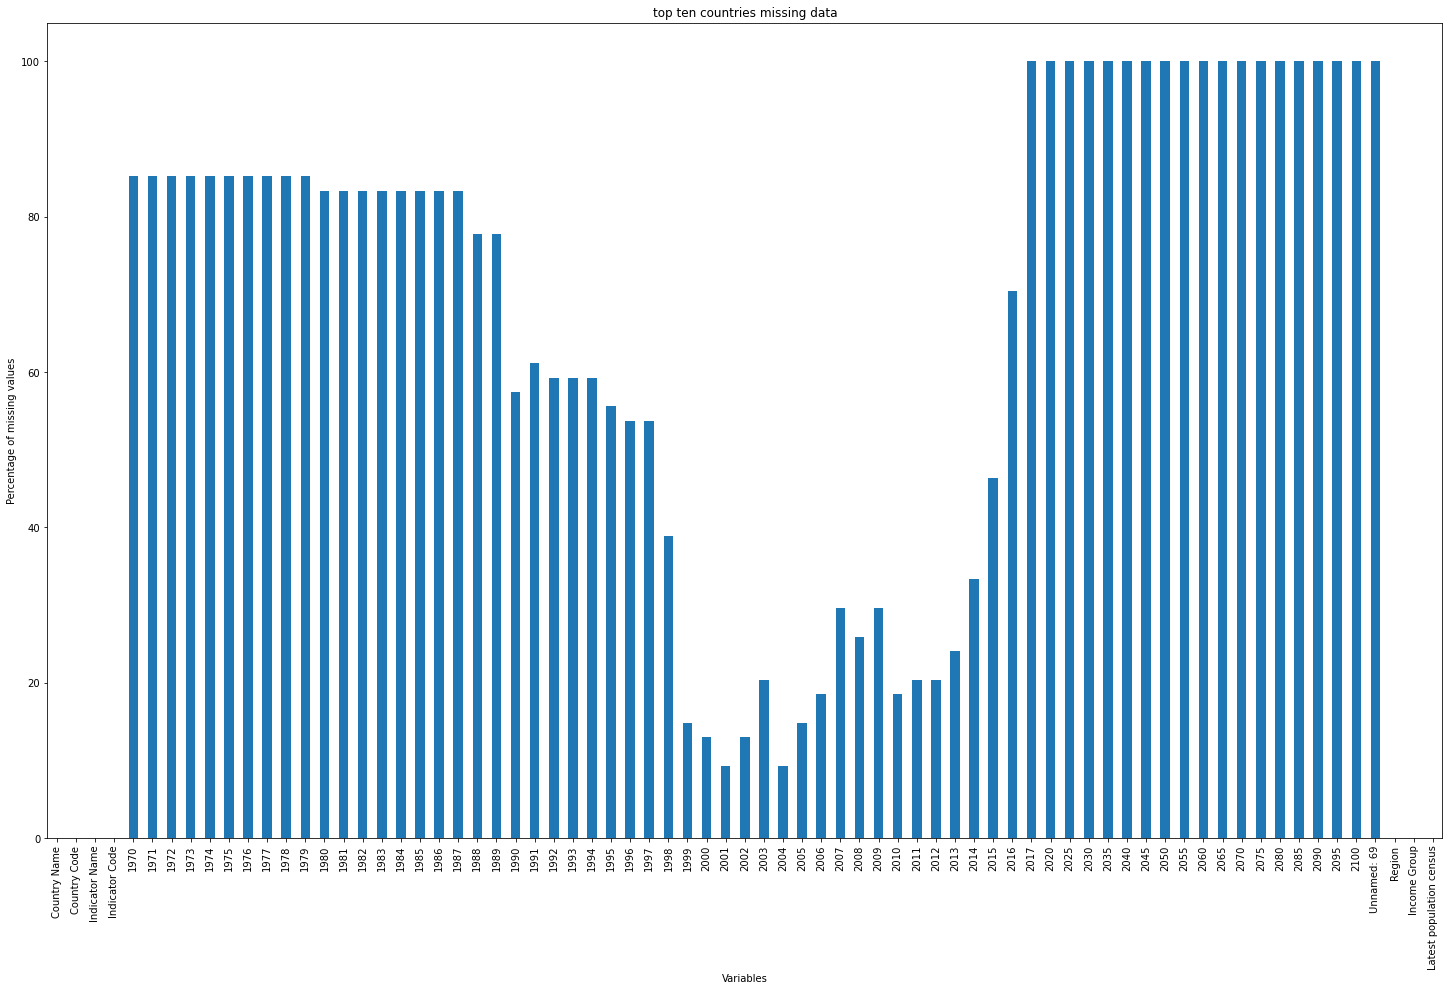

In [920]:
#msno.bar(data_ten_countries, fontsize=14)

(data_ten_countries.isnull().sum()/data_ten_countries.shape[0]*100) .plot.bar(figsize=(25,15))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('top ten countries missing data')

### compare between 2015 and 2016

In [921]:
data_ten_countries_dropped = data_ten_countries[data_ten_countries.columns[data_ten_countries.columns.isin(["Country Name","Country Code","Indicator Name",
                                              "Indicator Code","Income Group","Region",
                                              'Latest population census',"2015","2016"])]]
## keep year with more data 2016

In [922]:
data_ten_countries_dropped.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2015,2016,Region,Income Group,Latest population census
63550,Bermuda,BMU,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,North America,High income: nonOECD,2010
63680,Bermuda,BMU,Internet users (per 100 people),IT.NET.USER.P2,98.323610,98.0,North America,High income: nonOECD,2010
64161,Bermuda,BMU,Percentage of enrolment in secondary education...,SE.SEC.PRIV.ZS,43.366341,NaN,North America,High income: nonOECD,2010
64162,Bermuda,BMU,Percentage of enrolment in tertiary education ...,SE.TER.PRIV.ZS,0.719420,NaN,North America,High income: nonOECD,2010
64163,Bermuda,BMU,Percentage of enrolment in upper secondary edu...,UIS.PRP.3,NaN,NaN,North America,High income: nonOECD,2010


In [923]:
data_ten_countries_dropped['Indicator Name'].value_counts()

GDP per capita (current US$)                                                        9
Internet users (per 100 people)                                                     9
Percentage of enrolment in secondary education in private institutions (%)          9
Percentage of enrolment in tertiary education in private institutions (%)           9
Percentage of enrolment in upper secondary education in private institutions (%)    9
Personal computers (per 100 people)                                                 9
Name: Indicator Name, dtype: int64

(array([18.,  0.,  0.,  0.,  0., 30.,  0.,  0.,  0.,  6.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

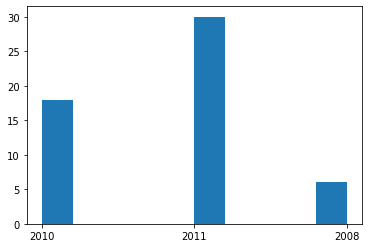

In [924]:
plt.hist(data_ten_countries_dropped["Latest population census"])# check latest census 

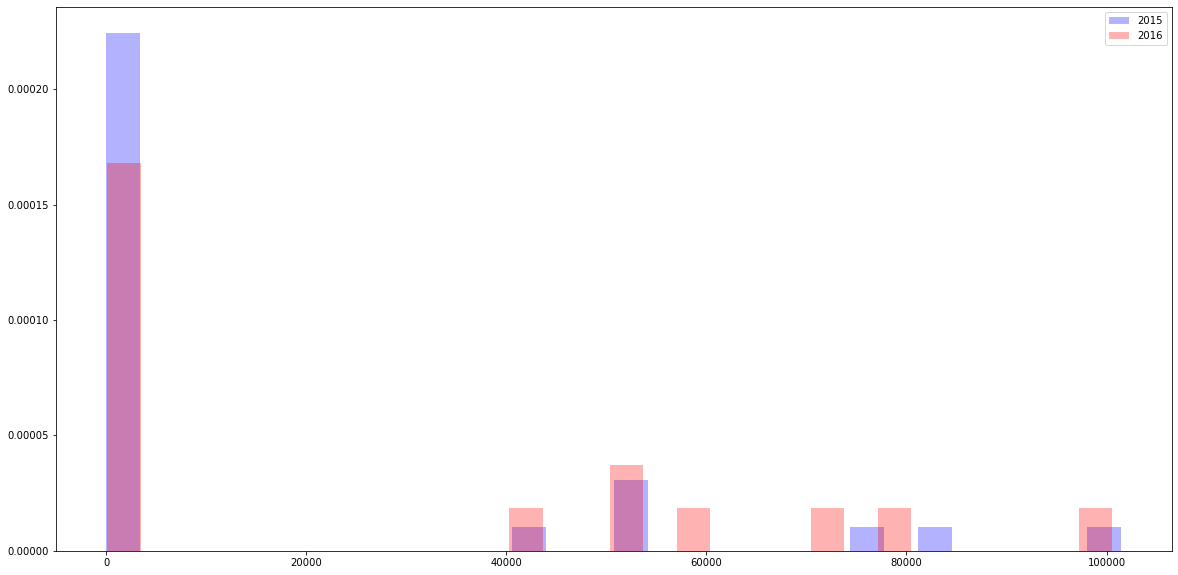

In [925]:
plt.figure(figsize=(20,10))
plt.hist(data_ten_countries_dropped['2015'], color='blue',bins=30 , alpha=.3, density=True,label='2015')
plt.hist(data_ten_countries_dropped['2016'], color='red',bins=30 , alpha=.3, density=True,label='2016')
plt.legend()
plt.show()

In [926]:
groupby_data = data_ten_countries_dropped.groupby('Country Name').mean()## create group data to compare betwwen 2015 and 2016

In [927]:
groupby_data

,2015,2016
Country Name,,
Bermuda,47.469790,98.000000
Denmark,13281.306051,26823.334228
Finland,10640.043657,21745.283457
Iceland,25416.321798,30037.591291
Luxembourg,50772.060202,50335.316954
Monaco,61.634641,95.208178
Norway,18660.068231,35504.527681
Sweden,12732.102222,26020.389130
Switzerland,20533.060657,39989.964787


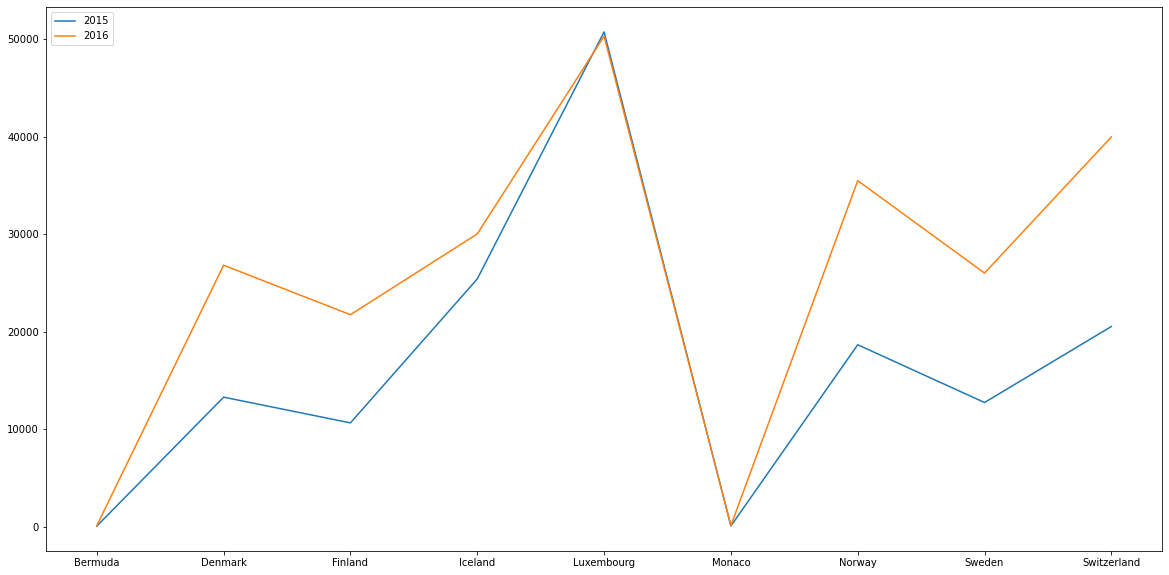

In [928]:
plt.figure(figsize=(20,10))
plt.plot(groupby_data['2015'], label="2015")
plt.plot(groupby_data['2016'], label="2016")
plt.legend(loc="upper left")
plt.show()

### pivot table

In [929]:
##try to use pivot table

In [615]:
data_pivot =data_ten_countries.pivot_table(index=['Country Name'], columns=['Indicator Name'],values=['2016','2015'])

In [616]:
data_pivot

2015                                  \
Indicator Name GDP per capita (current US$) Internet users (per 100 people)   
Country Name                                                                  
Bermuda                                 NaN                       98.323610   
Denmark                        53012.996584                       96.330500   
Iceland                        50734.443597                       98.200000   
Korea, Rep.                    27105.076226                       89.648631   
Luxembourg                    101446.786303                       97.334100   
Norway                         74521.569932                       96.810300   
Sweden                         50812.190860                       90.610200   
Switzerland                    82016.021313                       87.479056   
United Kingdom                 44305.554632                       92.000300   

                                                                                           \
Indicator Name Percentage of enrolment in secondary education in private institutions (%)   
Country Name                                                                                
Bermuda                                                 43.366341                           
Denmark                                                 13.614140                           
Iceland                                                       NaN                           
Korea, Rep.                                             31.228970                           
Luxembourg                                                    NaN                           
Norway                                                   7.125570                           
Sweden                                                  16.424690                           
Switzerland                                             12.009370                           
United Kingdom                                                NaN                           

                                                                                          \
Indicator Name Percentage of enrolment in tertiary education in private institutions (%)   
Country Name                                                                               
Bermuda                                                  0.719420                          
Denmark                                                  2.282980                          
Iceland                                                       NaN                          
Korea, Rep.                                             80.337318                          
Luxembourg                                                    NaN                          
Norway                                                  14.767120                          
Sweden                                                   9.183140                          
Switzerland                                             16.732889                          
United Kingdom                                                NaN                          

                                       2016                                  
Indicator Name GDP per capita (current US$) Internet users (per 100 people)  
Country Name                                                                 
Bermuda                                 NaN                       98.000000  
Denmark                        53549.700671                       96.967785  
Iceland                        59976.942565                       98.240016  
Korea, Rep.                    27538.806128                       92.716545  
Luxembourg                    100573.139978                       97.493930  
Norway                         70911.757159                       97.298204  
Sweden                         51949.271432                       91.506828  
Switzerland                    79890.524005                       89.405568  
United Kin

In [617]:
data_pivot.iloc[:1,:]

2015                                  \
Indicator Name GDP per capita (current US$) Internet users (per 100 people)   
Country Name                                                                  
Bermuda                                 NaN                        98.32361   

                                                                                           \
Indicator Name Percentage of enrolment in secondary education in private institutions (%)   
Country Name                                                                                
Bermuda                                                 43.366341                           

                                                                                          \
Indicator Name Percentage of enrolment in tertiary education in private institutions (%)   
Country Name                                                                               
Bermuda                                                   0.71942                          

                                       2016                                  
Indicator Name GDP per capita (current US$) Internet users (per 100 people)  
Country Name                                                                 
Bermuda                                 NaN                            98.0

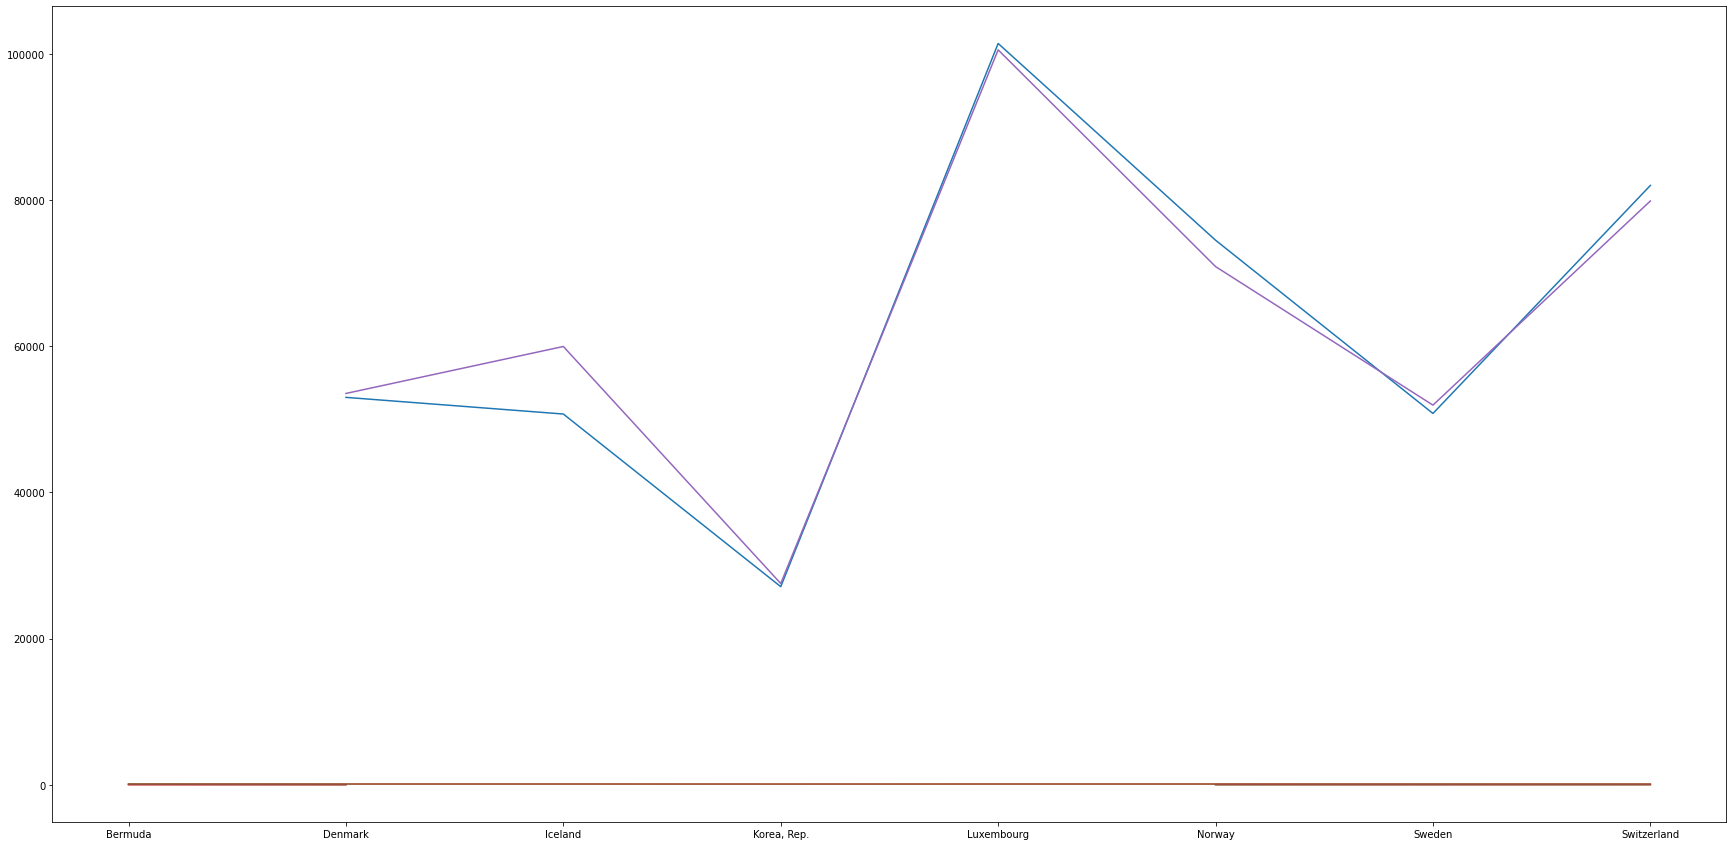

In [618]:
plt.figure(figsize=(30,15))
plt.plot(data_pivot.iloc[0:8,:])
